# Prepare Data

In [2]:
#Import everything
import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from utils import subset_df, plot_in_fig

2024-07-12 13:02:33.842822: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-12 13:02:33.848484: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-12 13:02:33.950763: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-12 13:02:36.133836: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
"""Clear Directory"""
#Careful. This will reset all of the resutls that we have collected /yunity/arusty/Graph-Manifold-Alignment/ManifoldData/S-curve/Base_Line_Scores(N7172)_AP(0.05-0.1-0.15-0.2-0.3-0.5)_47.npy
#tma.clear_directory(text_curater="merge", not_text=["distance", "similarity", "pure"])

#Converts old way of storing files to the new - if any
#tma.change_old_files_to_new()

Preparing to delete 2 files
First 10 file names to be deleted
-------------------------------------------------
['/yunity/arusty/Graph-Manifold-Alignment/ManifoldData/water_potability/SPUD(e9515)_Ope(normalize)_Kin(merge)_AP(0.05-0.1-0.3-0.2-0.15-0.5)_371.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData/water_potability/SPUD(e1738)_Ope(normalize)_Kin(merge)_AP(0.05-0.1-0.3-0.2-0.15-0.5)_371.npy']


Files Deleted.


True

In [3]:
"""Practice Tests to Run"""
test = tma.test_manifold_algorithms(csv_file="seeds.csv", split= "even", percent_of_anchors= [0.05, 0.1, 0.15, 0.2, 0.5], verbose=2, random_state= 1738)
#print(f"Anchors : {test.anchors}")
#print(f"KNN range {test.knn_range}")
#test.run_SPUD_tests()
#test.run_CSPUD_tests()
#test.run_DIG_tests(predict = False)
#test.run_NAMA_tests()
#test.run_DTA_tests()
#test.run_SSMA_tests()
#test.run_MAGAN_tests()
#test.run_KNN_tests()
#test.run_JLMA_tests()
#test.run_PCR_tests()
#test.run_DIG_Conections_tests(page_ranks=["None"], predict = False)
test.run_CSPUD_tests(operations= ["log"])


 
 
---------------------------       Initalizing class with seeds.csv data       ---------------------------

Spliting the data evenly
Split A features shape: (199, 4)
Split B Features shape (199, 3)
MDS initialized with 3 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)

-------------------------------------    SPUD Tests /seeds   -------------------------------------

Operation log
        KNN 2
            Percent of Anchors 0.05
                FOSCTTM Score: 0.003105982172167369
                CE Score: 0.6934673366834171
            Percent of Anchors 0.5
                FOSCTTM Score: 5.0503775157193e-05
                CE Score: 0.8844221105527639
            Percent of Anchors 0.1
                FOSCTTM Score: 0.003080730284588773
                CE Score: 0.8190954773869347
            Percent of Anchors 0.2
                FOSCTTM Score: 7.57556627357895e-05
                CE Score: 0.8442211055276382
            Percent of Anchors 0.15
            

True

In [2]:
#Veiwing with DataFrame
df = tma.upload_to_DataFrame()

#Add a combined metric to help see (The closer to 1 the better)
df["Combined_Metric"] = df["Cross_Embedding_KNN"] - df["FOSCTTM"]

#Save the Data Frame
df.to_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", index=False, na_rep='NaN')

In [2]:
#If there is no new data, we could just read in the old csvfile
df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)

In [3]:
df.sample(5)

csv_file method  seed    split  KNN  Percent_of_KNN  \
949674         seeds  CwDIG  1825     turn    2            0.01   
203510   tic-tac-toe    DTA  6299     turn  102            0.11   
1148114     treeData   SPUD  1738     even  234            0.17   
1351597      S-curve  CwDIG  1738     even   12            0.05   
596268     hepatitis    DTA  1825  distort    2            0.01   

        Percent_of_Anchors Page_Rank  Predicted_Feature_MAE  Operation  \
949674                 0.3      None                    NaN         10   
203510                 0.1       NaN                    NaN        NaN   
1148114               0.05       NaN                    NaN  normalize   
1351597                0.3      None                    NaN       None   
596268                0.15       NaN                    NaN        NaN   

        SPUDS_Algorithm   FOSCTTM  Cross_Embedding_KNN  \
949674              NaN  0.000581             0.949749   
203510              NaN  0.000526             0.787274   
1148114           merge  0.000000             0.272222   
1351597             NaN  0.009675             0.880000   
596268              NaN  0.042822             0.658228   

         A_Classification_Score  B_Classification_Score  Combined_Metric  
949674                 0.866667                0.866667         0.949168  
203510                 0.732639                0.722222         0.786749  
1148114                     NaN                     NaN         0.272222  
1351597                0.900000                0.966667         0.870325  
596268                 0.714286                0.690476         0.615406

In [14]:
from utils import get_DataFrame_stats
get_DataFrame_stats()

<><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>      DataFrame Statistics        <><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Total Number of instances in DataFrame: 1390508


 Method        Lengths
--------      ----------
 JLMA:          76770
 CwDIG:          270950
 MAGAN:          2874
 SSMA:          66670
 DTA:          66610
 Nama:          4994
 SPUD:          497600
 DIG:          364140


----------------------       Splits      ----------------------
Total data of random: 265126

 random        Lengths
--------      ----------
 MAGAN:          1248
 SSMA:          12480
 CwDIG:          38450
 JLMA:          12480
 DTA:          12480
 Nama:          1248
 SPUD:          103420
 DIG:          70840


Total data of even: 560136

 even        Lengths
--------      ----------
 MAGAN:          870
 SSMA:          26730
 CwDIG:          111000
 JLMA:          23730
 DTA:          26670
 Nama:          996
 SPUD:          206720
 DIG:   

In [7]:
# Just a safety inspection -> Checking to ensure we are not testing random seeds unfairly against each other
grouped = subset_df(df[df["csv_file"] != "blobs"][df["csv_file"] != "S-curve"], split = "random").groupby(['seed']).agg(
    csv_count=('csv_file', 'nunique'),   # Count occurrences of each seed
    method_count=('method', 'nunique')  # Count unique methods using each seed
).reset_index()

grouped["seed"].values

/tmp/ipykernel_1791543/2174829191.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grouped = subset_df(df[df["csv_file"] != "blobs"][df["csv_file"] != "S-curve"], split = "random").groupby(['seed']).agg(


array([  42, 1738, 1825, 2830, 3407, 3430, 5198, 7667, 9515])

In [16]:
grouped#["method_count", "seeds"]

seed  csv_count  method_count
0      17          1             5
1      81          1             5
2     203          2             5
3     381          1             5
4     410         26             2
..    ...        ...           ...
164  9941          1             5
165  9955          1             5
166  9958          1             5
167  9971          2             5
168  9998          1             5

[169 rows x 3 columns]

# Visualization Tests

## Comparing Methods with Box Plots

Observations: While DTA, DIG, SPUD, and NAMA all have similar distributions, both DIG and SPUD have instances that are signifacantly better than the other metrics. DIG preforms the best overall. 

*Note made May 10th (2k+ files taken into  account)

Secondly, MAGAN FOSCTTM is alway very low

In [16]:
df.columns

Index(['csv_file', 'method', 'seed', 'split', 'KNN', 'Percent_of_KNN',
       'Percent_of_Anchors', 'Page_Rank', 'Predicted_Feature_MAE', 'Operation',
       'SPUDS_Algorithm', 'FOSCTTM', 'Cross_Embedding_KNN',
       'A_Classification_Score', 'B_Classification_Score', 'Combined_Metric'],
      dtype='object')

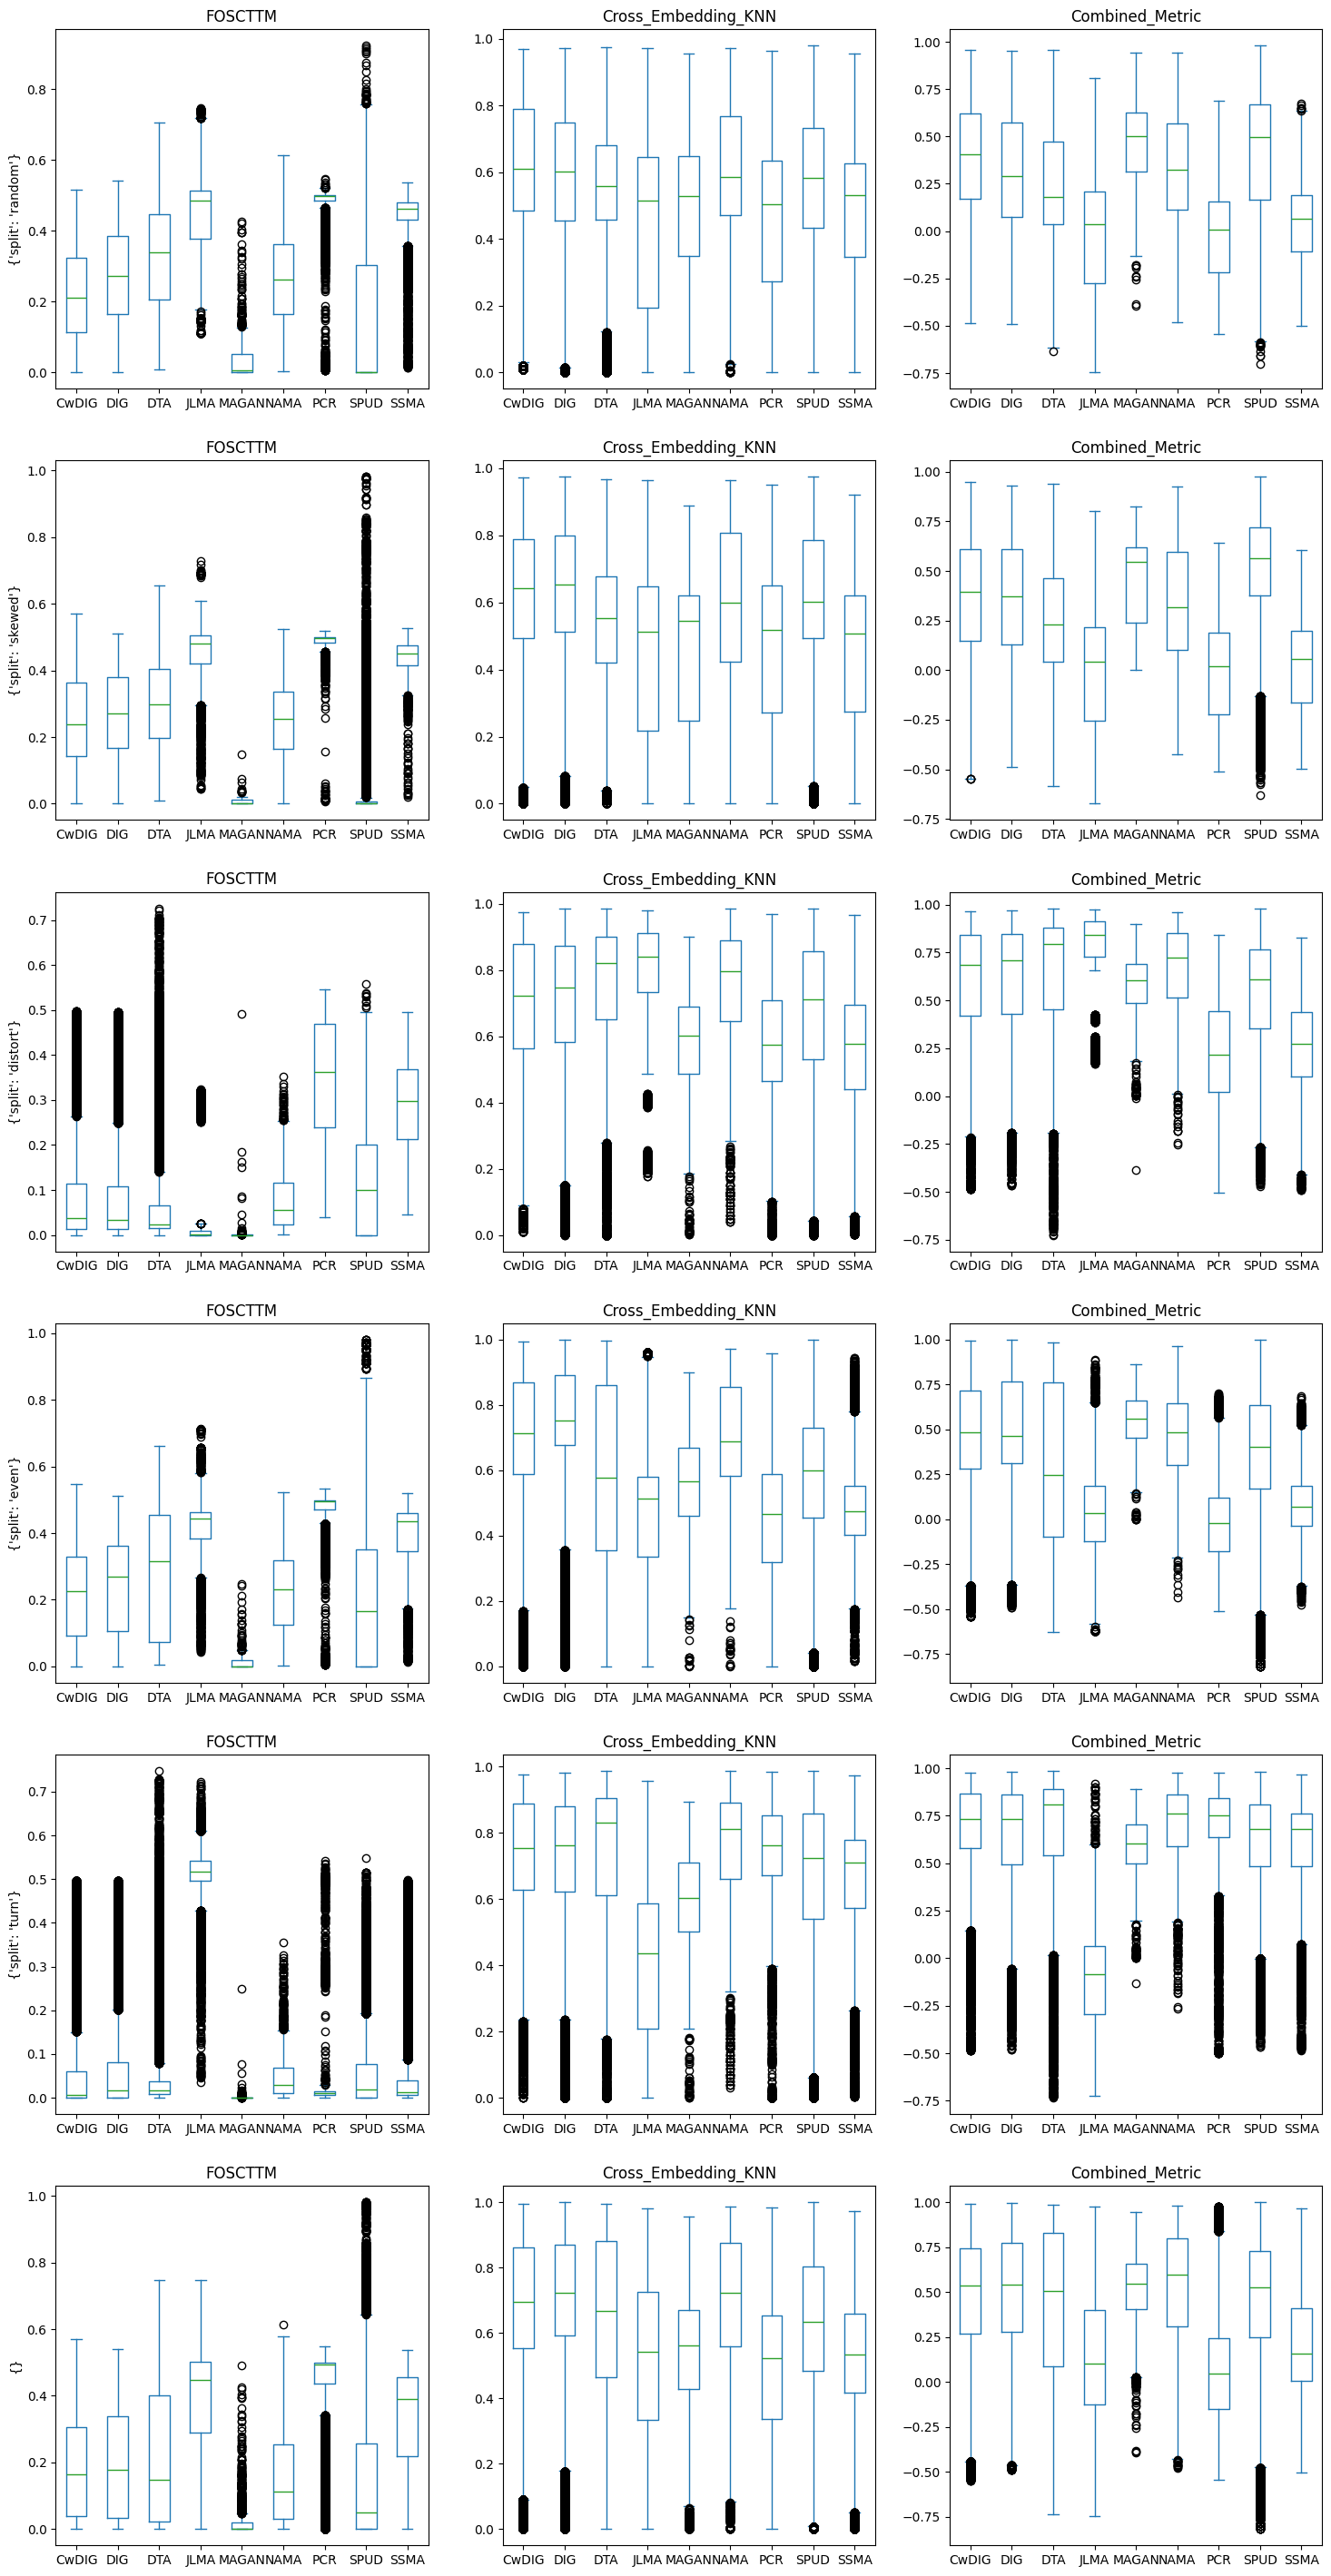

In [4]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         },
         {}]

plot_in_fig(df = df, columns = columns, rows = rows, by='method', kind = 'box')

## Comparing Arguments within the same Methods

### DIG

We See that Page Rank has little effect on the overall graph data

In [18]:
#If we want to see only a few csv files at a time, we can sub set it here
#df_subset2 = df[df["csv_file"] == "glass"]

#To see all of it combined
df_subset2 = df

#Change the method to DIG
df_subset2 = df_subset2[df_subset2["method"] == "DIG"]

In [19]:
df_subset2.sample(5)

csv_file method  seed   split  KNN  Percent_of_KNN  \
645006          crx    DIG  3407  skewed  100            0.15   
610548    audiology    DIG  8469    turn   14            0.07   
683558        blobs    DIG  2149    even   30            0.09   
532102    hepatitis    DIG  6913    turn   20            0.13   
458784  hill_valley    DIG  3495    turn   15            0.03   

       Percent_of_Anchors     Page_Rank  Predicted_Feature_MAE Operation  \
645006                0.1          None               0.279894       NaN   
610548               0.05          None               0.303206       NaN   
683558                0.1  off-diagonal               2.581642       NaN   
532102               0.15          None               0.598440       NaN   
458784               0.15  off-diagonal               0.493394       NaN   

       SPUDS_Algorithm   FOSCTTM  Cross_Embedding_KNN  A_Classification_Score  \
645006             NaN  0.363921             0.861446                0.725000   
610548             NaN  0.399058             0.257895                0.438596   
683558             NaN  0.405956             0.673333                0.600000   
532102             NaN  0.079395             0.528986                0.690476   
458784             NaN  0.001500             0.653465                0.505495   

        B_Classification_Score  Combined_Metric  
645006                0.860000         0.497524  
610548                0.438596        -0.141163  
683558                0.655556         0.267378  
532102                0.690476         0.449590  
458784                0.505495         0.651965

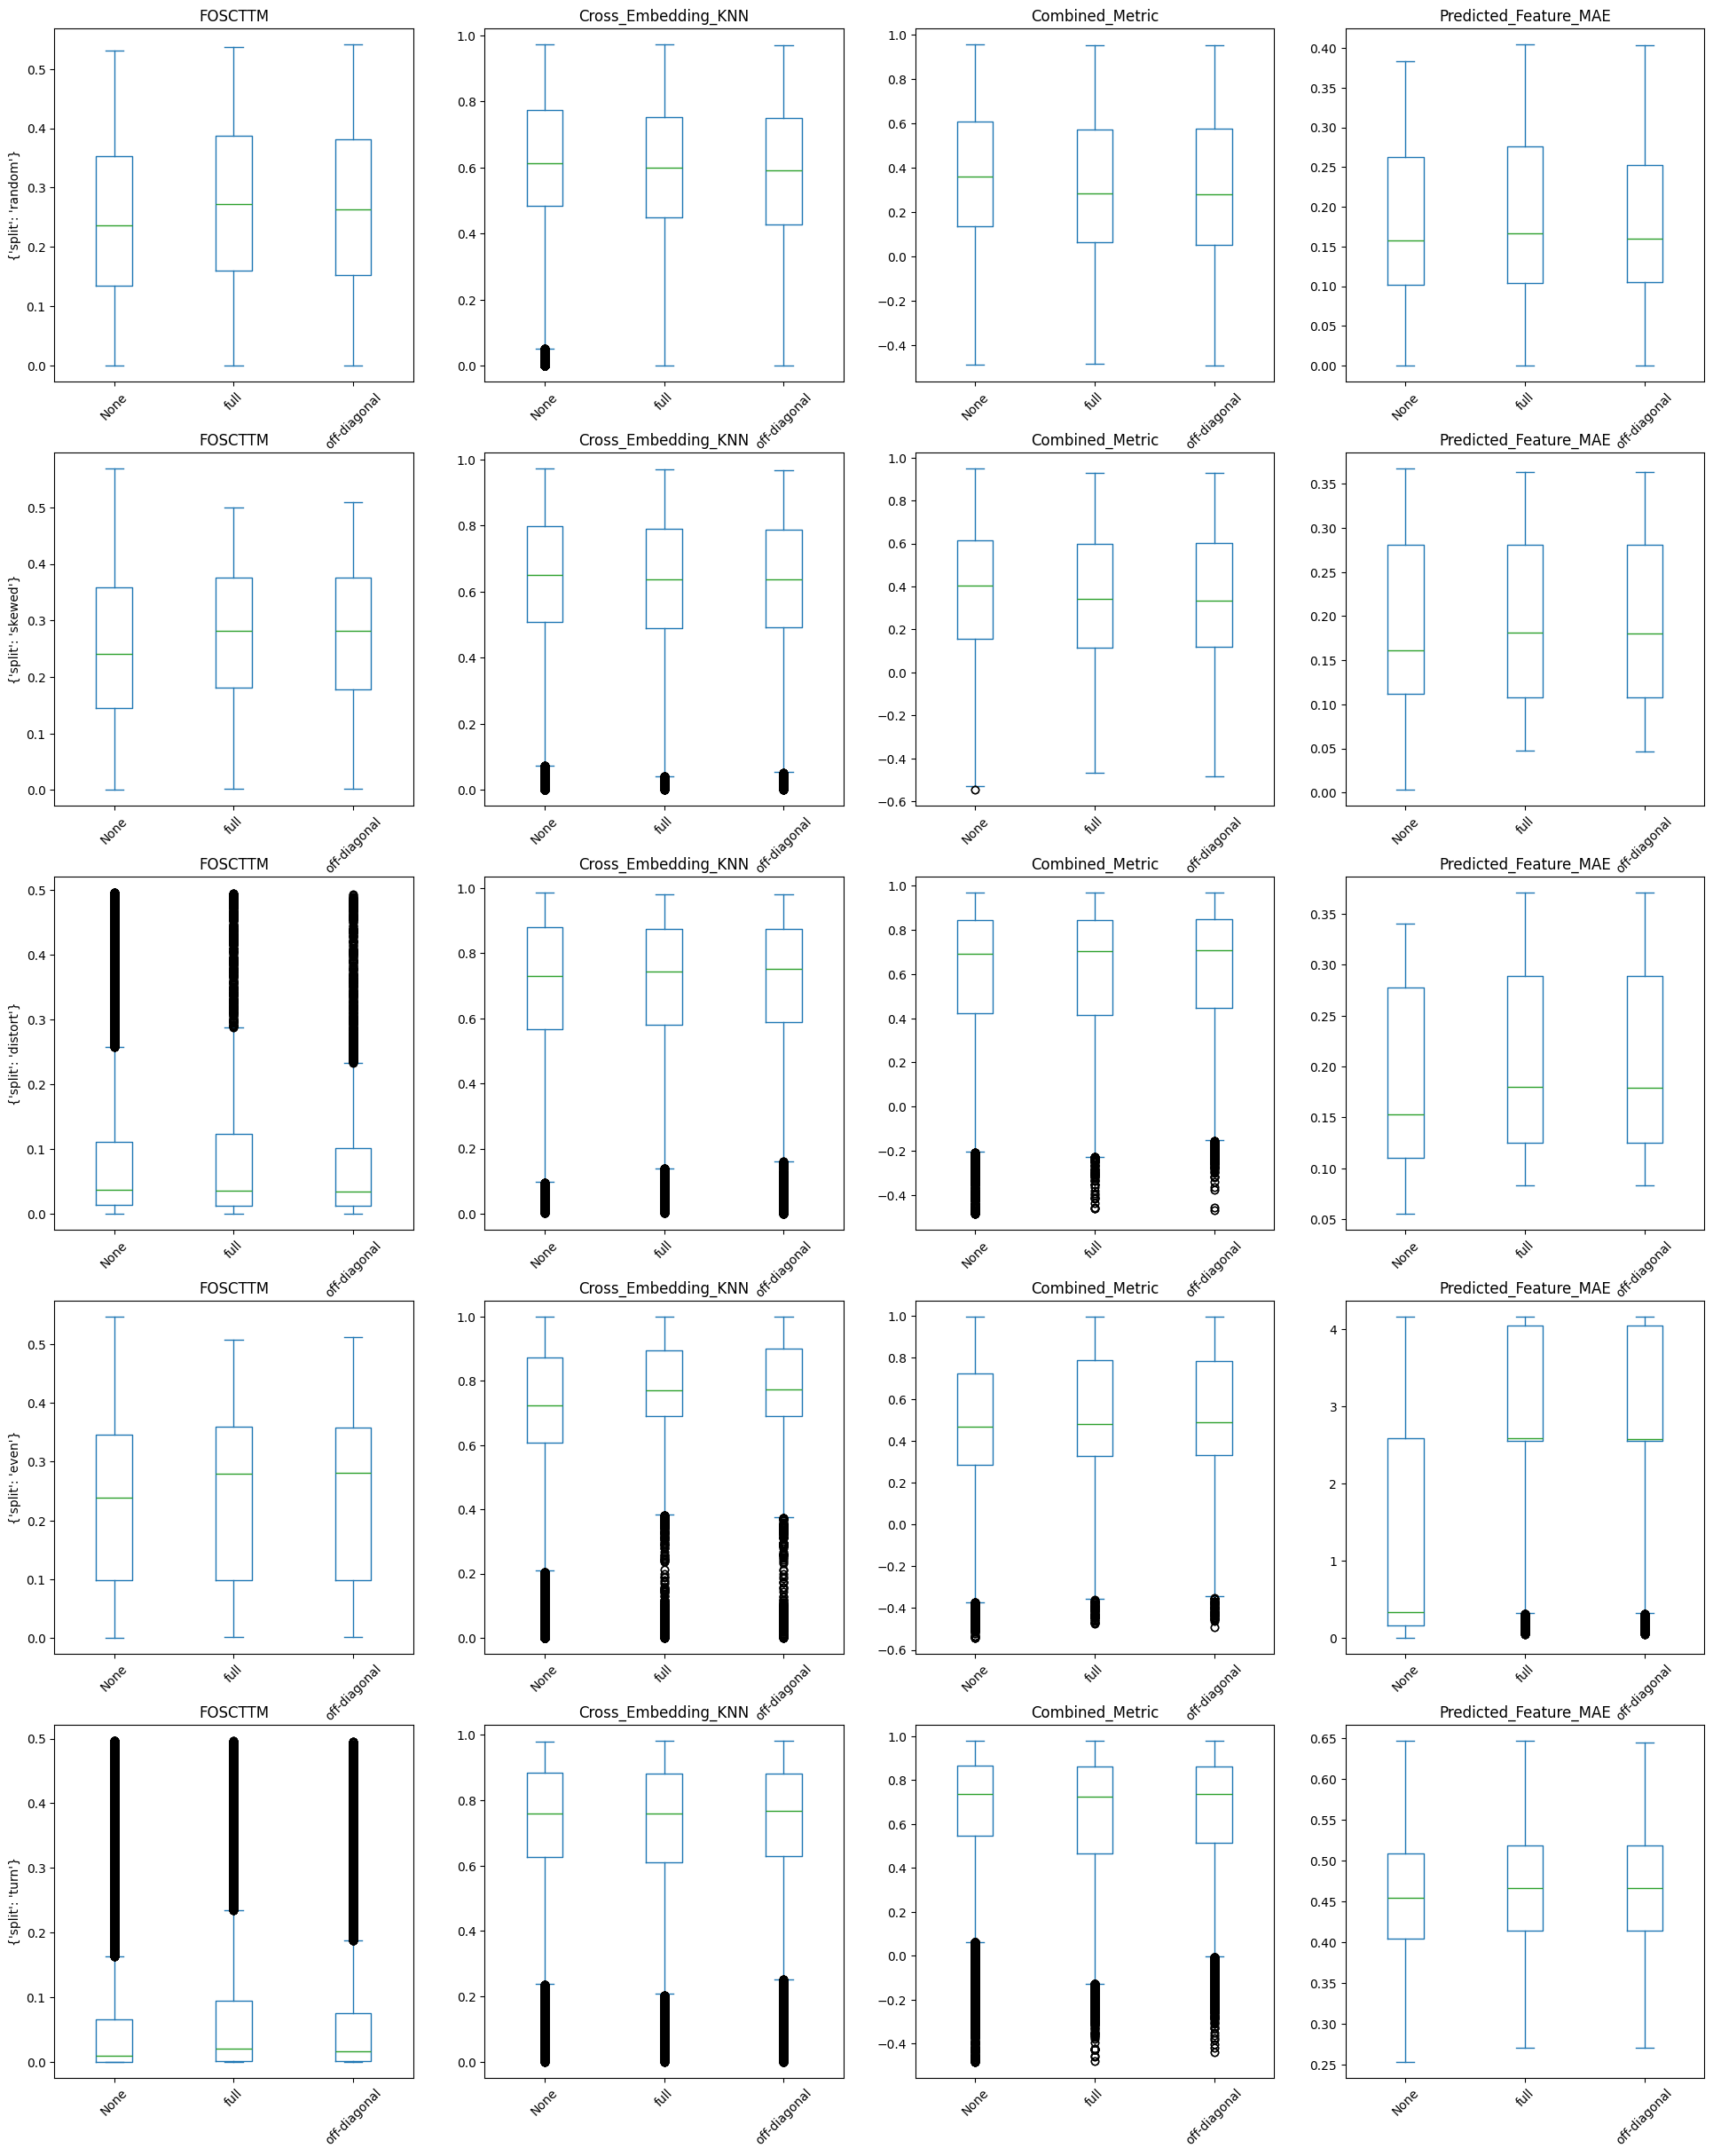

In [20]:

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}, {"column": "Predicted_Feature_MAE"}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         }]

plot_in_fig(columns = columns, rows = rows, by='Page_Rank', kind = 'box',  rot = 45)

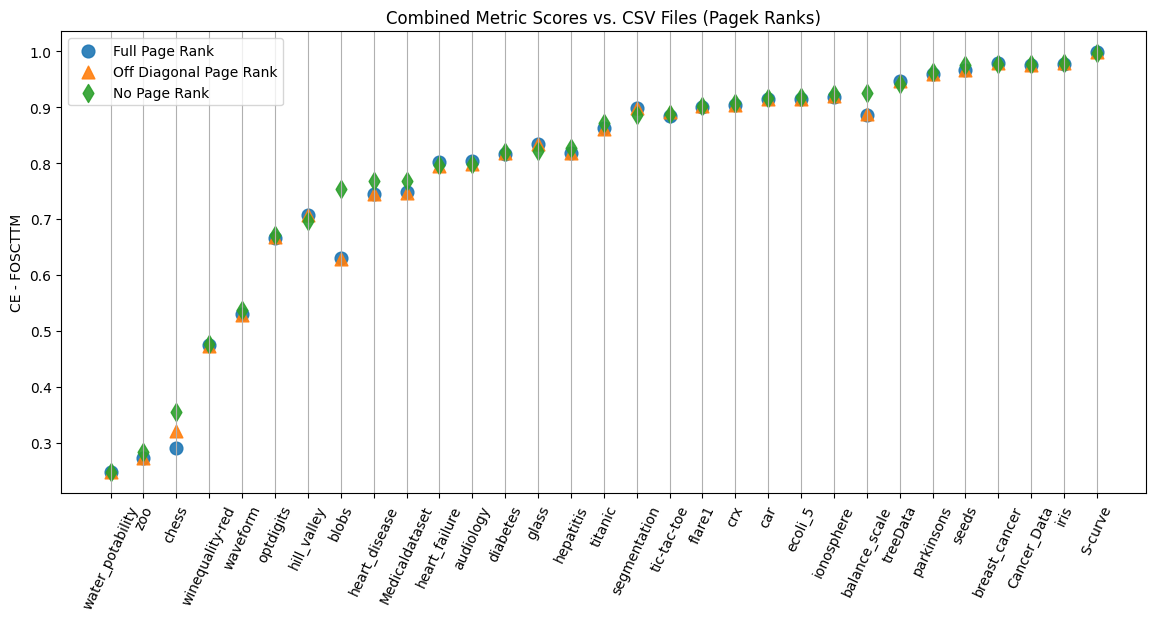

In [21]:
#Create an aggregate DF 
agregate_df = pd.DataFrame({
    'Full_Page_Rank': df[df["Page_Rank"] == "off-diagonal"].groupby("csv_file")["Combined_Metric"].max(),
    'Off-Diagonal_Page_Rank': df[df["Page_Rank"] == "full"].groupby("csv_file")["Combined_Metric"].max(),
    'No_Page_Rank': df[df["Page_Rank"] == "None"].groupby("csv_file")["Combined_Metric"].max()
})


agregate_df = agregate_df.sort_values(by = "No_Page_Rank").reset_index()

#To make it easier to add edits
key_words = {"x" : agregate_df.index,
            "s" : 84,
            "alpha" : .90}

plt.figure(figsize=(14, 6))
ax = plt.scatter(y = agregate_df["Full_Page_Rank"], label = "Full Page Rank", **key_words) #I'm back and forth on the helpfulness of the markers
ax = plt.scatter(y = agregate_df["Off-Diagonal_Page_Rank"], marker = '^', label = "Off Diagonal Page Rank", **key_words)
ax = plt.scatter(y = agregate_df["No_Page_Rank"], marker = 'd', label = "No Page Rank", **key_words)


#Show Legend
plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 65)
plt.title(f"Combined Metric Scores vs. CSV Files (Pagek Ranks)")
plt.ylabel("CE - FOSCTTM")
plt.grid(visible=True, axis = "x")
plt.legend()
plt.show()

In [22]:
subset_df(df, method = "CwDIG")[10:20]

csv_file method  seed   split KNN  Percent_of_KNN  \
151  heart_disease  CwDIG  2969  skewed   8            0.03   
152  heart_disease  CwDIG  2969  skewed   8            0.03   
153  heart_disease  CwDIG  2969  skewed  14            0.05   
154  heart_disease  CwDIG  2969  skewed  14            0.05   
155  heart_disease  CwDIG  2969  skewed  14            0.05   
156  heart_disease  CwDIG  2969  skewed  14            0.05   
157  heart_disease  CwDIG  2969  skewed  14            0.05   
158  heart_disease  CwDIG  2969  skewed  14            0.05   
159  heart_disease  CwDIG  2969  skewed  20            0.07   
160  heart_disease  CwDIG  2969  skewed  20            0.07   

    Percent_of_Anchors Page_Rank  Predicted_Feature_MAE Operation  \
151               0.15      None               0.285098       0.2   
152                0.5      None               0.285899       0.2   
153               0.05      None               0.282736       0.2   
154                0.1      None               0.284001       0.2   
155                0.3      None               0.284350       0.2   
156                0.2      None               0.287206       0.2   
157               0.15      None               0.289690       0.2   
158                0.5      None               0.287027       0.2   
159               0.05      None               0.284657       0.2   
160                0.1      None               0.285391       0.2   

    SPUDS_Algorithm   FOSCTTM  Cross_Embedding_KNN  A_Classification_Score  \
151             NaN  0.345084             0.545455                0.566667   
152             NaN  0.165289             0.552189                0.566667   
153             NaN  0.394126             0.508418                0.588889   
154             NaN  0.394603             0.518519                0.588889   
155             NaN  0.261799             0.501684                0.588889   
156             NaN  0.302792             0.562290                0.588889   
157             NaN  0.372847             0.535354                0.588889   
158             NaN  0.191143             0.562290                0.588889   
159             NaN  0.405531             0.498316                0.577778   
160             NaN  0.401314             0.555556                0.577778   

     B_Classification_Score  Combined_Metric  
151                0.566667         0.200371  
152                0.566667         0.386899  
153                0.555556         0.114291  
154                0.555556         0.123916  
155                0.555556         0.239885  
156                0.555556         0.259497  
157                0.555556         0.162506  
158                0.555556         0.371147  
159                0.588889         0.092785  
160                0.588889         0.154242

### SPUD

Notes:
1. Distance + Avg seems to be the best metric most of the time, although they seem pretty similar

In [23]:
subset_df(df, Operation = "abs")

csv_file method  seed   split KNN  Percent_of_KNN  \
743      heart_disease   SPUD  5198  random   2            0.01   
744      heart_disease   SPUD  5198  random   2            0.01   
745      heart_disease   SPUD  5198  random   2            0.01   
746      heart_disease   SPUD  5198  random   2            0.01   
747      heart_disease   SPUD  5198  random   2            0.01   
...                ...    ...   ...     ...  ..             ...   
1387521        S-curve   SPUD  6517    even  47            0.19   
1387522        S-curve   SPUD  6517    even  47            0.19   
1387523        S-curve   SPUD  6517    even  47            0.19   
1387524        S-curve   SPUD  6517    even  47            0.19   
1387525        S-curve   SPUD  6517    even  47            0.19   

        Percent_of_Anchors Page_Rank  Predicted_Feature_MAE Operation  \
743                   0.05       NaN                    NaN       abs   
744                    0.1       NaN                    NaN       abs   
745                    0.3       NaN                    NaN       abs   
746                    0.2       NaN                    NaN       abs   
747                   0.15       NaN                    NaN       abs   
...                    ...       ...                    ...       ...   
1387521                0.5       NaN                    NaN       abs   
1387522                0.5       NaN                    NaN       abs   
1387523                0.5       NaN                    NaN       abs   
1387524                0.5       NaN                    NaN       abs   
1387525                0.5       NaN                    NaN       abs   

        SPUDS_Algorithm   FOSCTTM  Cross_Embedding_KNN  \
743                pure  0.468875             0.461279   
744                pure  0.434593             0.491582   
745                pure  0.327982             0.484848   
746                pure  0.375665             0.471380   
747                pure  0.408076             0.488215   
...                 ...       ...                  ...   
1387521            pure  0.209350             0.580000   
1387522            pure  0.209350             0.580000   
1387523            pure  0.209350             0.580000   
1387524            pure  0.209350             0.580000   
1387525            pure  0.209350             0.580000   

         A_Classification_Score  B_Classification_Score  Combined_Metric  
743                    0.622222                0.444444        -0.007596  
744                    0.622222                0.444444         0.056990  
745                    0.622222                0.444444         0.156866  
746                    0.622222                0.444444         0.095716  
747                    0.622222                0.444444         0.080139  
...                         ...                     ...              ...  
1387521                0.633333                0.916667         0.370650  
1387522                0.700000                0.983333         0.370650  
1387523                0.866667                0.966667         0.370650  
1387524                0.750000                1.000000         0.370650  
1387525                0.733333                0.933333         0.370650  

[189060 rows x 16 columns]

/tmp/ipykernel_2234921/1399079137.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["Combined_Arguments"] = df_sub["Operation"]+ " and " + df_sub["SPUDS_Algorithm"]


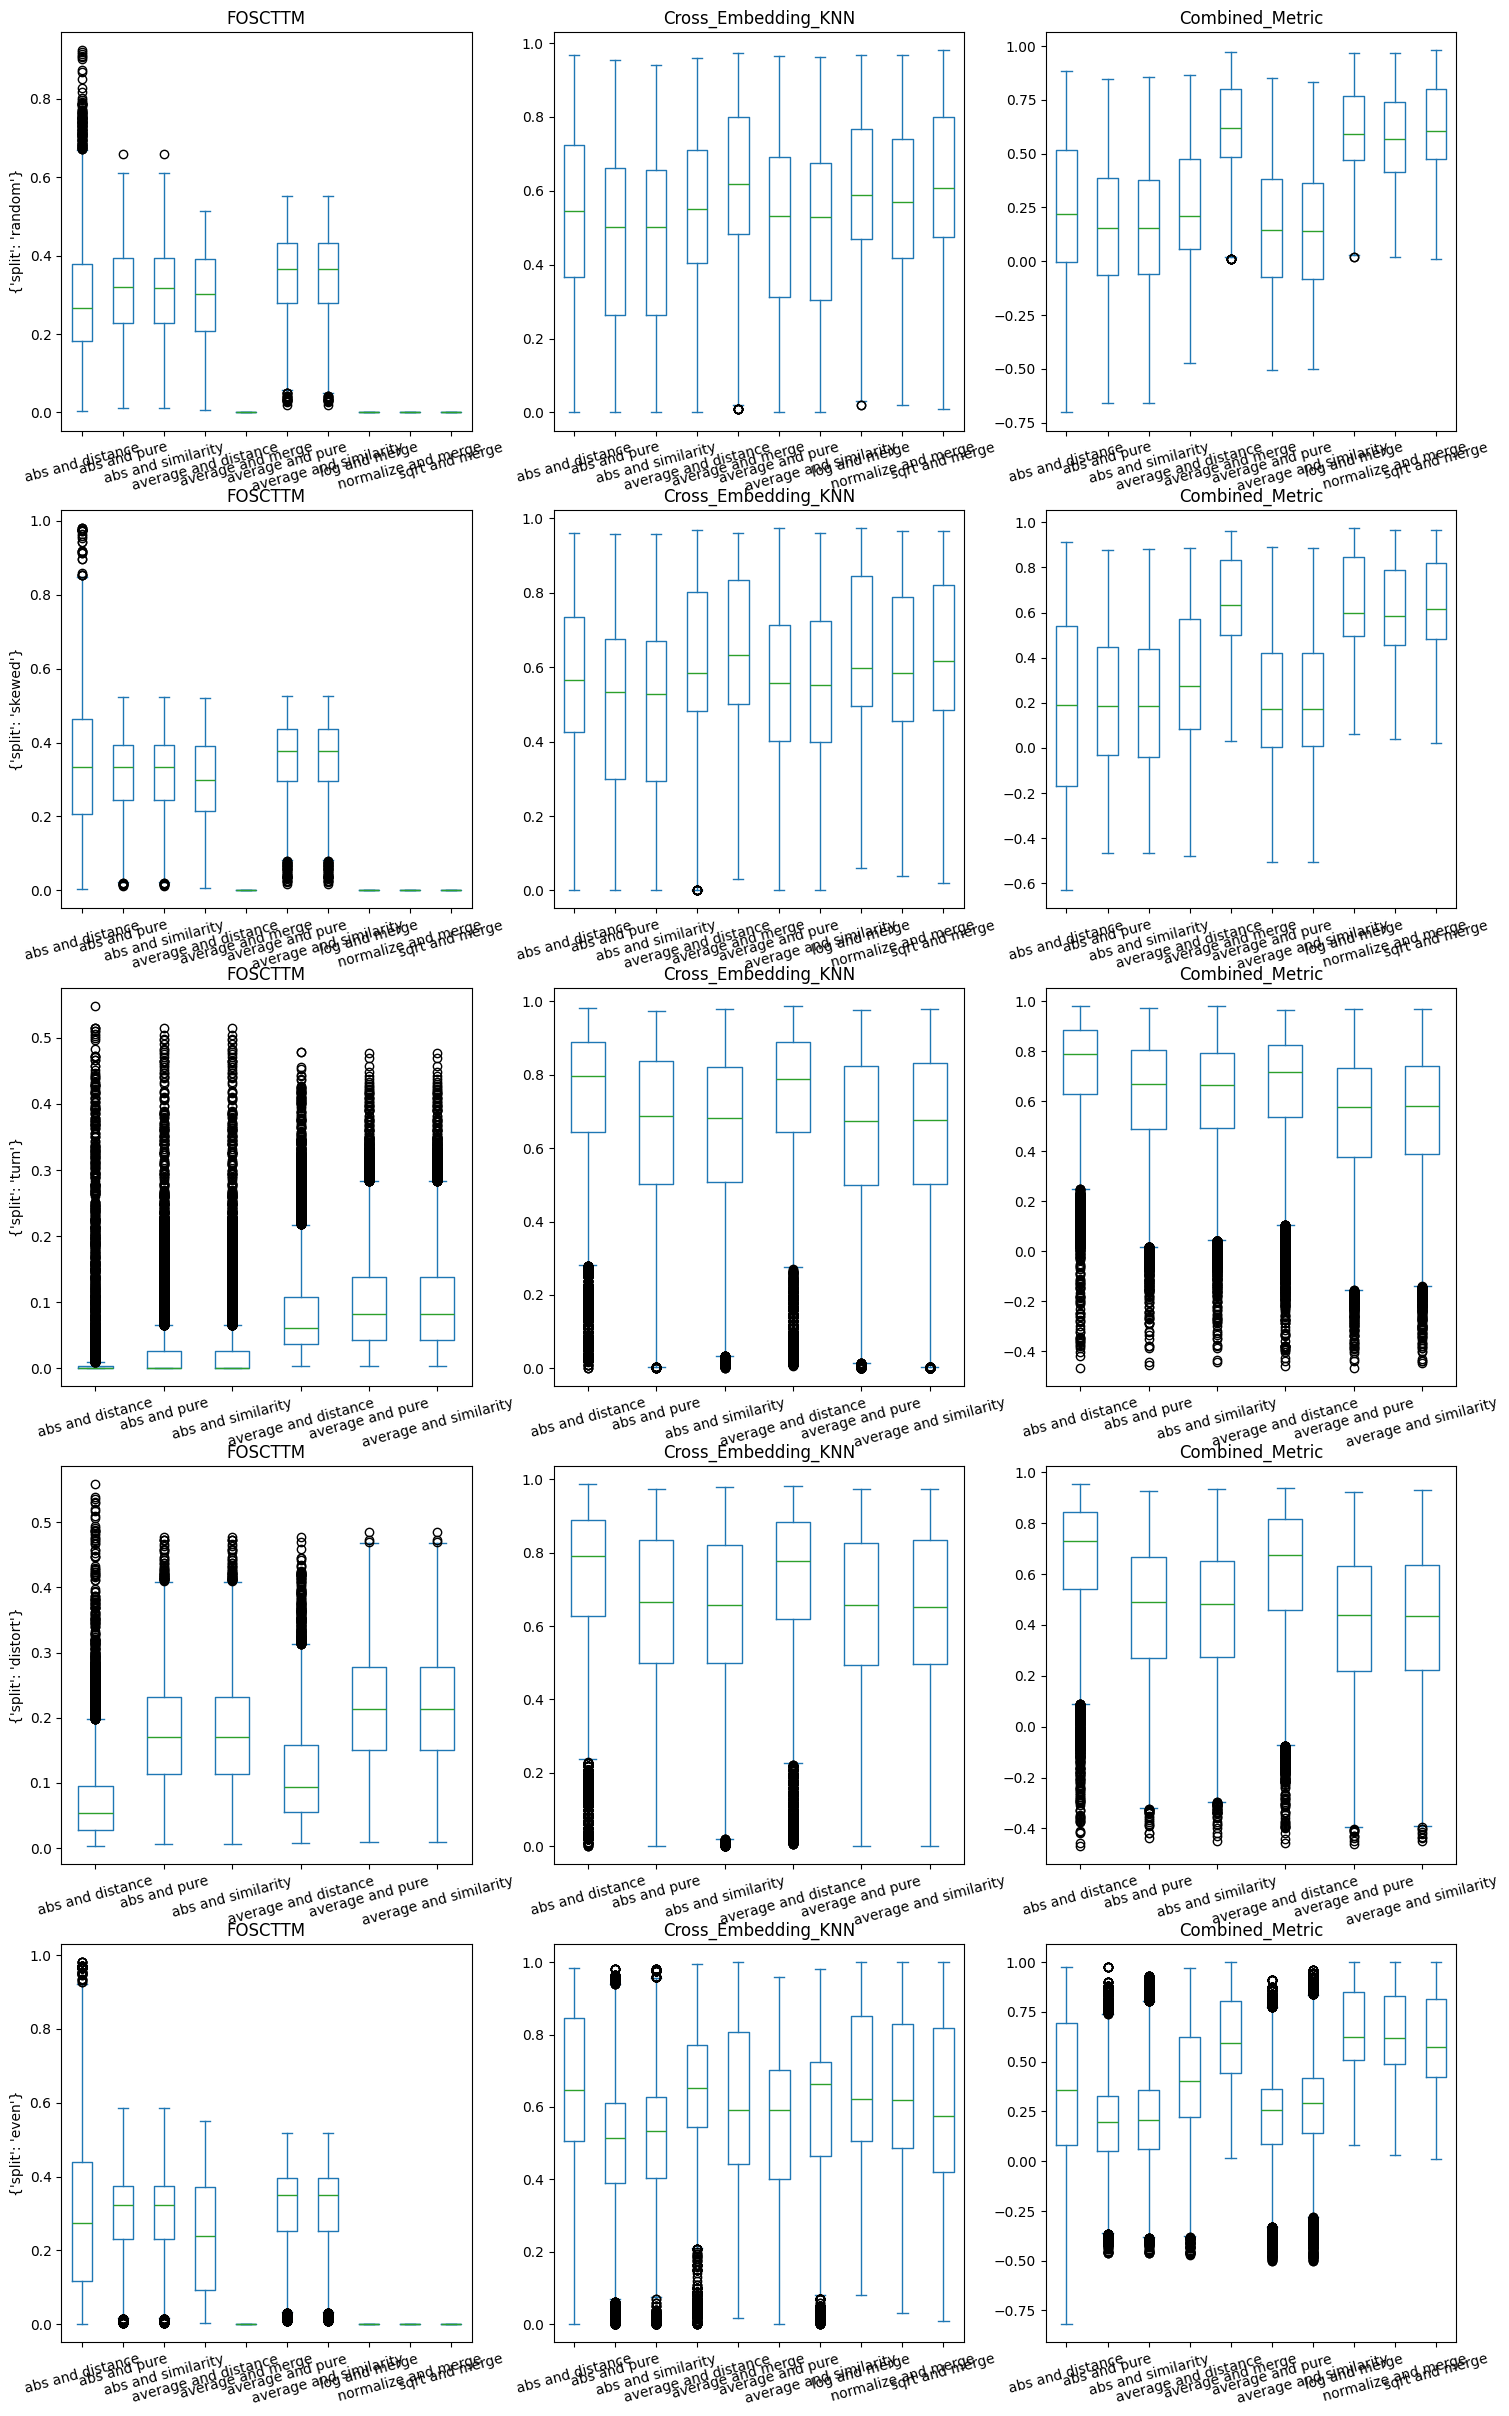

In [24]:
#To make it easier to add edits
key_words = {"figsize": (10, 6),
            "kind": "box",
            "by": "Combined_Arguments",
            "rot": 15}

#Combine SPUD argumenst
df_sub = subset_df(df, method = "SPUD")
df_sub["Combined_Arguments"] = df_sub["Operation"]+ " and " + df_sub["SPUDS_Algorithm"]

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed"#, "csv_file" : "iris"
         }, 
        {"split" : "turn"#, "csv_file" : "iris"
         },
         {"split" : "distort" #, "csv_file" : "iris"
         }, 
        {"split" : "even"#, "csv_file" : "iris"
         }]

plot_in_fig(df = df_sub, columns = columns, rows = rows, **key_words)

## Comparing Methods against CSV Files

DTA seems to be the best on split methods that are made arbitrarily, like the "turn" and the "distort", where as DIG and SPUD preform the best when the data is split "random" or skewed

In [32]:
def plt_methods_by_CSV_max(df = df, sort_by = "DIG", metric = "Combined_Metric", return_df =False, plot_methods = ["SSMA", "MAGAN", "DTA", "SPUD_D", "SPUD_M", "DIG", "CwDIG", "NAMA", "PCR", "JLMA", "Split_A", "Split_B"]):
    """df should equal the dataframe. It can be subsetted already
    
    Plots the max of the combined metric for each method to each CSV_File
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].max(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].max(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].max(),
        'SPUD_D': df[df["SPUDS_Algorithm"]== "distance"].groupby("csv_file")[metric].max(),
        'SPUD': df[df["SPUDS_Algorithm"] == "merge"].groupby("csv_file")[metric].max(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].max(),
        'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].max(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].max(),
        'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].max(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].max(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].max(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].max()
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index - 0.1,
                "s" : 50,
                "alpha" : .90,
                #"edgecolor" : "black",
                #"linewidth": 0.5,
                #"facecolor": "None"
                }

    plt.figure(figsize=(16, 6))
    
    if "DIG" in plot_methods:
        ax = plt.scatter(y = agregate_df["DIG"], marker = '^', label = "DIG", **key_words)
    if "MAGAN" in plot_methods:
        ax = plt.scatter(y = agregate_df["MAGAN"], marker = 'h', label = "MAGAN", **key_words)
    if "JLMA" in plot_methods:
        ax = plt.scatter(y = agregate_df["JLMA"], marker = '_', label = "JLMA", **key_words)
    if "SPUD_D" in plot_methods:
        ax = plt.scatter(y = agregate_df["SPUD_D"], label = "SPUD_D", **key_words)
    if "Split_A" in plot_methods:
        ax = plt.scatter(y = agregate_df["Split_A"], marker = '.', label = "Split A", **key_words)

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index + 0.1,
                "s" : 50,
                "alpha" : .90,
                #"edgecolor" : "black",
                #"linewidth": 0.5,
                #"facecolor": "None"
                }
    if "CwDIG" in plot_methods:
        ax = plt.scatter(y = agregate_df["CwDIG"], marker = '^', label = "CwDIG", **key_words)
    if "NAMA" in plot_methods:
        ax = plt.scatter(y = agregate_df["NAMA"], marker = '*', label = "NAMA", **key_words)
    if "PCR" in plot_methods:
        ax = plt.scatter(y = agregate_df["PCR"], marker = 'v', label = "Procrutees", **key_words)
    if "DTA" in plot_methods:
        ax = plt.scatter(y = agregate_df["DTA"], marker = "d", label = "DTA", **key_words)
    if "SPUD" in plot_methods:
        ax = plt.scatter(y = agregate_df["SPUD"], label = "SPUD", **key_words)
    if "SSMA" in plot_methods:
        ax = plt.scatter(y = agregate_df["SSMA"],  marker = 's', label = "SSMA", **key_words) 
    if "Split_B" in plot_methods:
        ax = plt.scatter(y = agregate_df["Split_B"], marker = '.', label = "Split B", **key_words)


    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"{metric} Scores vs. CSV Files (MAX)")
    plt.ylabel(metric)
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

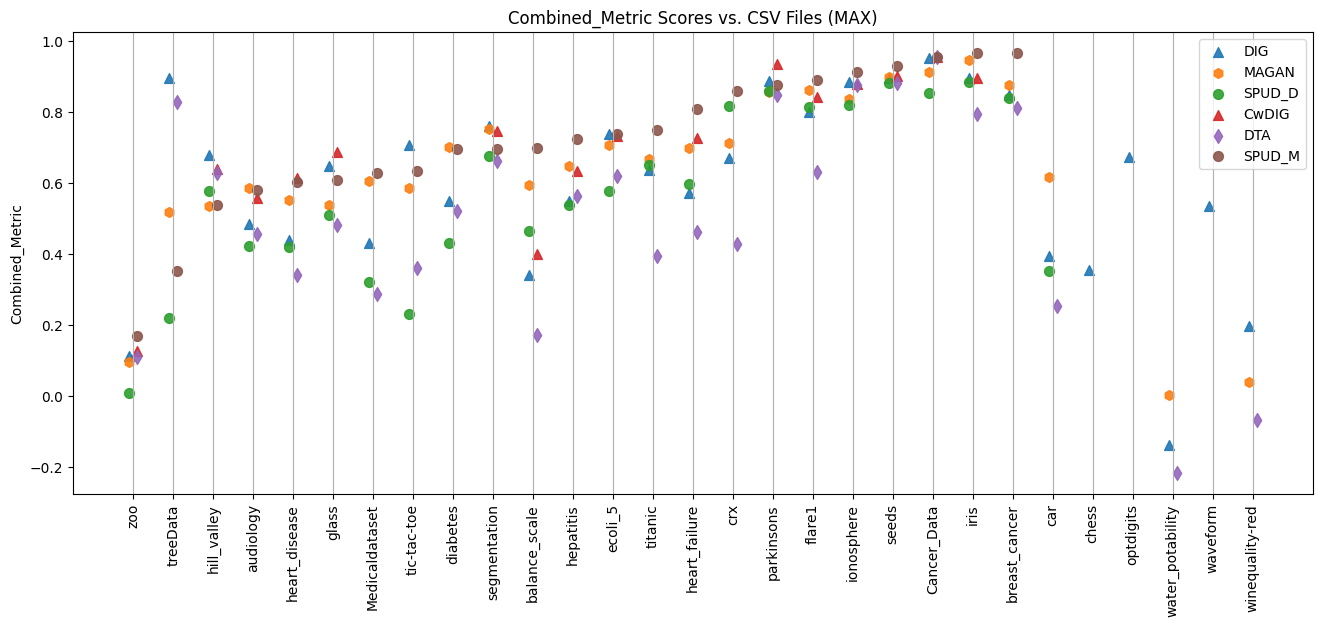

In [4]:
#plt_methods_by_CSV_max(df = df, sort_by = "DIG") #This shows all of the data gather
plt_methods_by_CSV_max(df = subset_df(df, split = "random"), metric = "Combined_Metric", sort_by="SPUD_M", plot_methods = ["MAGAN", "DTA", "DIG", "SPUD_D", "SPUD_M", "CwDIG"])

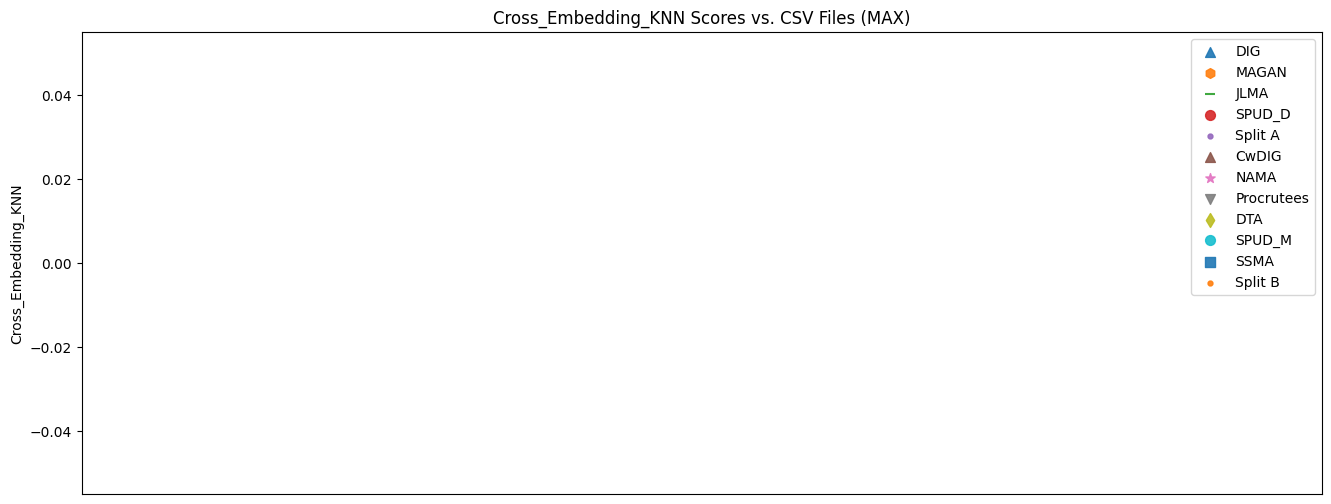

In [5]:
plt_methods_by_CSV_max(df = subset_df(df, split = "skewed", seed = 1825), metric = "Cross_Embedding_KNN", sort_by="DIG")

In [6]:
def plt_methods_by_CSV_mean(df = df, sort_by = "SPUD", metric = "Combined_Metric", return_df = False):
    """Plots 95 percent confident intervals for each method against csv files
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].mean(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].mean(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].mean(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].mean(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].mean(),
        'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].mean(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].mean(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].mean(),
        'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].mean(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].mean(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].mean()
    })

    #Calculate error bars
    err_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].std(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].std(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].std(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].std(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].std(),
        'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].std(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].std(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].std(),
        'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].std(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].std(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].std()
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"ms" : 8,
                "alpha" : .75}

    plt.figure(figsize=(20, 6))
    ax = plt.errorbar(x = agregate_df.index - 0.1, y = agregate_df["DTA"], yerr = err_df["DTA"], fmt = ".", label = "DTA", **key_words)
    ax = plt.errorbar(x = agregate_df.index, y = agregate_df["SPUD"], yerr = err_df["SPUD"], fmt = ".", label = "SPUD", **key_words) 
    ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["DIG"], yerr = err_df["DIG"],fmt = '.', label = "DIG", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["CwDIG"], yerr = err_df["CwDIG"],fmt = '.', label = "CwDIG", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.1, y = agregate_df["SSMA"], yerr = err_df["SSMA"],fmt = '.', label = "SSMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index - 0.2, y = agregate_df["NAMA"], yerr = err_df["NAMA"],fmt = '.', label = "NAMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.3, y = agregate_df["MAGAN"], yerr = err_df["MAGAN"],fmt = '.', color = "black", label = "MAGAN", **key_words)
    ax = plt.errorbar(x = agregate_df.index, y = agregate_df["JLMA"], yerr = err_df["JLMA"], fmt = ".", label = "JMLA", **key_words) 
    ax = plt.errorbar(x = agregate_df.index - 0.3, y = agregate_df["PCR"], yerr = err_df["PCR"], fmt = ".", label = "Procrustees", **key_words) 




    ax = plt.errorbar(x = agregate_df.index+ 0.4, y = agregate_df["Split_A"], yerr = err_df["Split_A"], fmt = "_", label = "Split_A", **key_words) 
    ax = plt.errorbar(x = agregate_df.index - 0.4, y = agregate_df["Split_B"], yerr = err_df["Split_B"], fmt = "_", label = "Split_B", **key_words) 


    plt.ylim([-0.3, 1])

    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"{metric} Scores vs. CSV Files (MEAN)")
    plt.ylabel(metric)
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

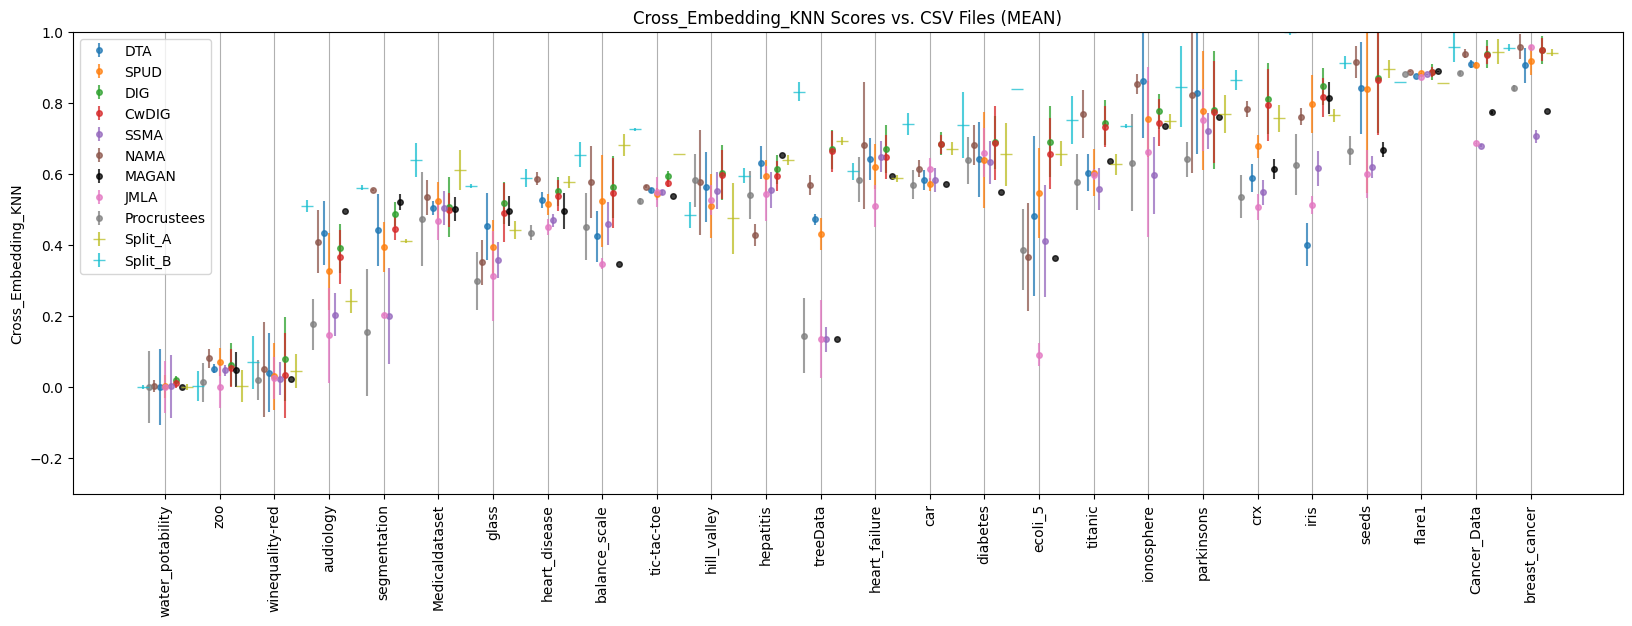

In [7]:
#plt_methods_by_CSV_mean(sort_by="NAMA") #This shows all of the data gather
plt_methods_by_CSV_mean(df = subset_df(df, split = "skewed"), metric = "Cross_Embedding_KNN", sort_by="DIG")

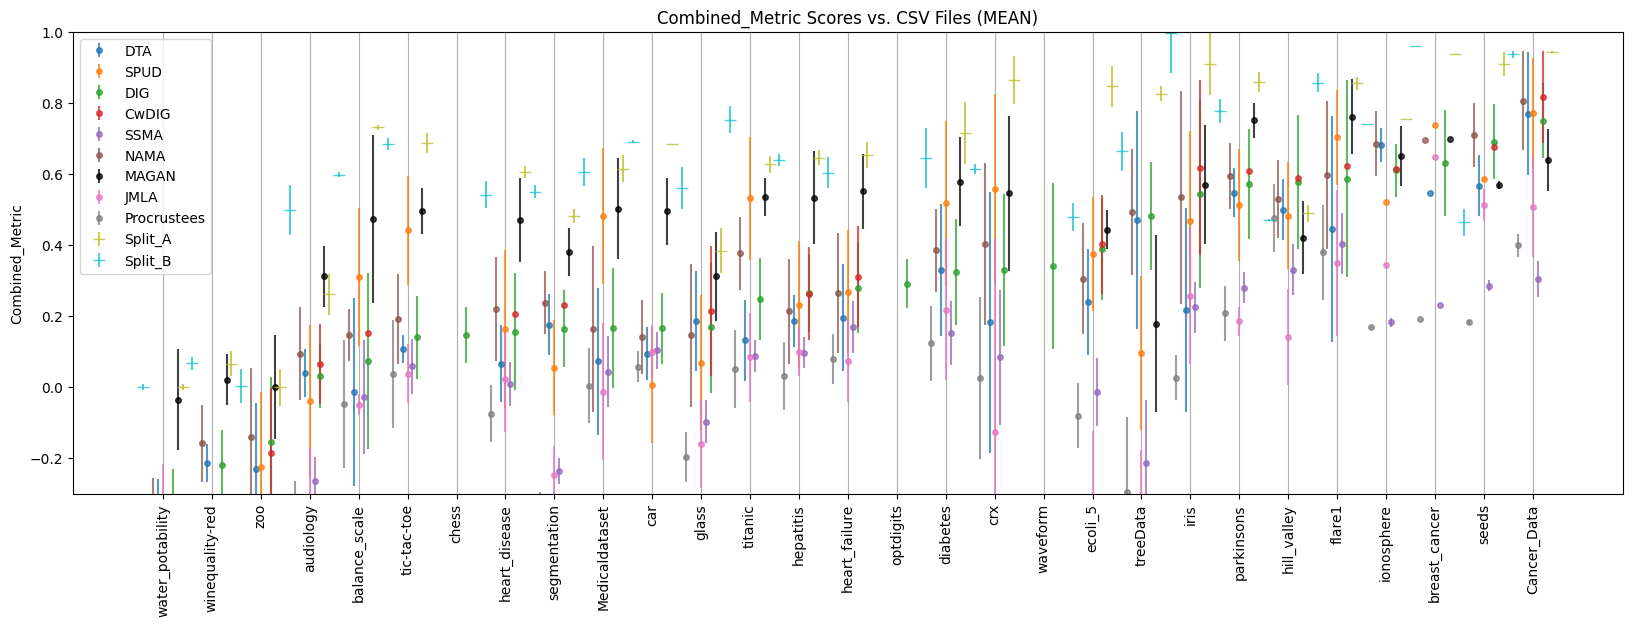

In [8]:
plt_methods_by_CSV_mean(df = subset_df(df, split = "random"), sort_by="DIG")

### Rankings
TODO: Have results for different splits

In [9]:
#Veiw the files that have mising values. We won't include them in the rankings
plt_methods_by_CSV_max(df = df, return_df=True).drop(columns= ["csv_file", "Split_A", "Split_B"]).rank(ascending=False, method='max', axis = 1)

SSMA  MAGAN   DTA  SPUD_D  SPUD_M  DIG  CwDIG  NAMA   PCR  JLMA
0    5.0    6.0   9.0     4.0     7.0  3.0    8.0   2.0  10.0   1.0
1    5.0    9.0   2.0     6.0     4.0  3.0    7.0   8.0   1.0  10.0
2    NaN    NaN   NaN     NaN     NaN  1.0    NaN   NaN   NaN   NaN
3    6.0    9.0   2.0     4.0    10.0  3.0    8.0   7.0   1.0   5.0
4    NaN    NaN   NaN     NaN     NaN  1.0    NaN   NaN   NaN   NaN
5    7.0    2.0   9.0     6.0     1.0  5.0    3.0   4.0   8.0  10.0
6    NaN    NaN   NaN     NaN     NaN  1.0    NaN   NaN   NaN   NaN
7    4.0    9.0   6.0     7.0     8.0  2.0    3.0   5.0   1.0  10.0
8    8.0   10.0   1.0     6.0    10.0  3.0    4.0   5.0   2.0   7.0
9    3.0    8.0  10.0     6.0     7.0  2.0    9.0   5.0   1.0   4.0
10   7.0   10.0   1.0     2.0     3.0  5.0    9.0   6.0   4.0   8.0
11  10.0    9.0   1.0     8.0     6.0  3.0    4.0   5.0   7.0   2.0
12   7.0    9.0   1.0     5.0     8.0  3.0   10.0   4.0   6.0   2.0
13   2.0   10.0   1.0     8.0     5.0  3.0    6.0   9.0   4.0   7.0
14   8.0   10.0   1.0     5.0     9.0  2.0    3.0   6.0   4.0   7.0
15   6.0    9.0   3.0     5.0     8.0  1.0   10.0   4.0   2.0   7.0
16   3.0    6.0   4.0     7.0     2.0  8.0    1.0   9.0   5.0  10.0
17   8.0    6.0   3.0     5.0    10.0  1.0    9.0   2.0   7.0   4.0
18  10.0    7.0   1.0     4.0     8.0  3.0    5.0   6.0   9.0   2.0
19   5.0    6.0   1.0     7.0     8.0  3.0    4.0   9.0   2.0  10.0
20   9.0    8.0   1.0     4.0     7.0  2.0   10.0   5.0   6.0   3.0
21   9.0   10.0   1.0     4.0     8.0  3.0    2.0   5.0   7.0   6.0
22   8.0    6.0   5.0     1.0     9.0  4.0   10.0   3.0   7.0   2.0
23   8.0   10.0   1.0     7.0     3.0  4.0    5.0   9.0   6.0   2.0
24   9.0   10.0   2.0     3.0     8.0  1.0    5.0   6.0   7.0   4.0
25  10.0    9.0   1.0     3.0     8.0  4.0    6.0   5.0   7.0   2.0
26   9.0   10.0   1.0     4.0     8.0  4.0    5.0   6.0   7.0   2.0
27   9.0   10.0   1.0     2.0     8.0  4.0    4.0   6.0   7.0   5.0
28   7.0   10.0   4.0     3.0     5.0  1.0    9.0   8.0   2.0   6.0
29   9.0    8.0  10.0     1.0     5.0  2.0    4.0   3.0   7.0   6.0
30   8.0    7.0   3.0     5.0     4.0  1.0    2.0   6.0   9.0  10.0

In [10]:
def get_ranks(show_more = False, **kwargs):
    #The amount of comparisions
    NUM = 10

    #Sort by Split
    split_df = subset_df(df=df, **kwargs)

    if "split" in kwargs.keys():
        split = kwargs["split"]
    else:
        split = "No"

    #Sort Df by CSV
    csv_df = plt_methods_by_CSV_max(df = split_df, return_df=True)
    csv_df = csv_df.drop(columns= ["csv_file", "Split_A", "Split_B"]).dropna()
    df_ranked = csv_df.rank(ascending=False, method='max', axis = 1)

    #This shows which method has preformed the Best overall
    print(f"Ranked across {split} Split\n-----------------------\n{df_ranked.mean(axis = 0).sort_values(ascending=True)}")
    if show_more:
        print(f"\n \nSTD of Ranks across {split} Split\n----------------------------\n{df_ranked.std(axis = 0).sort_values(ascending=True)}")
        print(f"\n\nNumber of times each Method did best for each CSV\n--------------------------------------------------\n{csv_df.idxmax(axis = 1).value_counts().sort_values(ascending=False)}")
    #print(f"\n \nDistance from Split_A and Split_B with a {split} Split\n----------------------------------------------------------\n{df_ranked[""].std(axis = 0).sort_values(ascending=True)}")

    #Get the csv file with Cross embedding as the max
    csv_df2 = plt_methods_by_CSV_max(df = split_df, return_df=True, metric = "Cross_Embedding_KNN").dropna()
    d1 = len(csv_df2)
    columns = csv_df2.columns[1:-2]

    #Add their Overall value
    print(f"\n  Combined Metric Scores\n------------------------------------------------------------------------------")
    print(pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,NUM)), columns = columns)._append(pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,NUM)), columns = columns).rank(ascending=False, method='max', axis = 1)))

    #Drop the SPlits from the df
    methods_df = csv_df2.drop(columns=["csv_file", "Split_A", "Split_B"])

    #Create the baseline Scalar, and drop NaN
    baseline = np.reshape(csv_df2.values[:, -2:].max(axis = 1), newshape = (d1,1))

    #Print out average
    print(f"\n\n\n          Distance of CE from Split A and Split B baseline on Average\n------------------------------------------------------------------------------")

    #Calculate the values and print their rank underneath
    print(pd.DataFrame(np.reshape(np.mean(methods_df.to_numpy() - baseline, axis = 0), newshape = (1,NUM)), columns = columns)._append(pd.DataFrame(np.reshape(np.mean(methods_df.to_numpy(), axis = 0), newshape = (1,NUM)), columns = columns).rank(ascending=False, method='max', axis = 1)))

    if show_more:
        print(f"\n\n\n               Distance of CE from Split A and Split B baseline\n------------------------------------------------------------------------------")

        #Calculate the values
        print(pd.DataFrame(methods_df.to_numpy() - baseline, columns = columns, index = csv_df2["csv_file"]))



In [11]:
#NOTE: DIG has the best Preformance :) --> The Rankings reflect often how well each will be away from the main one
get_ranks(show_more = True)

Ranked across No Split
-----------------------
DIG       2.964286
DTA       3.071429
SPUD_D    4.714286
PCR       5.214286
JLMA      5.500000
NAMA      5.642857
CwDIG     5.892857
SPUD_M    6.678571
SSMA      7.107143
MAGAN     8.321429
dtype: float64

 
STD of Ranks across No Split
----------------------------
DIG       1.527092
MAGAN     1.944671
SPUD_D    1.959916
NAMA      2.022362
SSMA      2.249927
SPUD_M    2.480346
PCR       2.766963
CwDIG     2.832866
DTA       3.005286
JLMA      3.085210
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DTA       14
DIG        5
PCR        4
SPUD_D     2
JLMA       1
SPUD_M     1
CwDIG      1
Name: count, dtype: int64

  Combined Metric Scores
------------------------------------------------------------------------------
      SSMA      MAGAN       DTA    SPUD_D    SPUD_M      DIG     CwDIG  \
0  0.72767   0.707197  0.794784  0.797529  0.747841  0.81789  0.746155   
0  9.0000

In [12]:
get_ranks(split = "random", seed = "1738") #Seeds:  42, 1738, 1825, 2830, 3407, 3430, 5198, 7667, 9515

Ranked across random Split
-----------------------
SPUD_M    1.636364
CwDIG     2.909091
DIG       3.272727
MAGAN     3.727273
DTA       5.272727
NAMA      5.454545
SPUD_D    5.727273
SSMA      8.636364
JLMA      8.727273
PCR       9.636364
dtype: float64

  Combined Metric Scores
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA   SPUD_D    SPUD_M     DIG    CwDIG     NAMA  \
0  0.172369  0.546437  0.458594  0.46763  0.622044  0.5611  0.59168  0.47807   
0  8.000000  4.000000  7.000000  6.00000  1.000000  3.0000  2.00000  5.00000   

         PCR      JLMA  
0   0.075237  0.118532  
0  10.000000  9.000000  



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA    SPUD_D    SPUD_M       DIG     CwDIG  \
0 -0.175096 -0.167433 -0.088239 -0.092047 -0.105013 -0.031095 -0.055013   
0       8.0       7.0

In [13]:
get_ranks(show_more = True, split = "even")

Ranked across even Split
-----------------------
SPUD_M    2.0
CwDIG     2.2
DIG       3.4
NAMA      4.4
MAGAN     4.6
DTA       6.0
SPUD_D    6.0
SSMA      8.2
JLMA      9.0
PCR       9.2
dtype: float64

 
STD of Ranks across even Split
----------------------------
SSMA      0.836660
CwDIG     0.836660
PCR       0.836660
SPUD_D    1.000000
NAMA      1.140175
SPUD_M    1.414214
JLMA      1.414214
DIG       1.816590
DTA       2.121320
MAGAN     2.792848
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
SPUD_M    3
CwDIG     1
DIG       1
Name: count, dtype: int64

  Combined Metric Scores
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA    SPUD_D    SPUD_M       DIG     CwDIG  \
0  0.415589  0.688876  0.603652  0.673755  0.843248  0.751198  0.804018   
0  8.000000  5.000000  7.000000  6.000000  1.000000  3.000000  2.000000   

       NAMA       PCR       JLMA

In [14]:
get_ranks(split = "skewed")

Ranked across skewed Split
-----------------------
SPUD_M    1.277778
CwDIG     2.111111
DIG       3.555556
NAMA      4.500000
MAGAN     5.000000
DTA       5.888889
SPUD_D    6.000000
SSMA      8.444444
JLMA      8.611111
PCR       9.611111
dtype: float64

  Combined Metric Scores
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA    SPUD_D    SPUD_M       DIG     CwDIG  \
0  0.271168  0.580868  0.523751  0.578587  0.755536  0.667344  0.705346   
0  8.000000  5.000000  7.000000  6.000000  1.000000  3.000000  2.000000   

       NAMA        PCR      JLMA  
0  0.604624   0.182197  0.239037  
0  4.000000  10.000000  9.000000  



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
      SSMA     MAGAN       DTA    SPUD_D    SPUD_M       DIG     CwDIG  \
0 -0.14836 -0.193569 -0.065741 -0.034185 -0.036825  0.006443 -0.007373   
0      7

In [15]:
split_df = subset_df(df, split = "distort")

In [16]:
csv_df = plt_methods_by_CSV_max(df = split_df, return_df=True)
csv_df = csv_df.drop(columns= ["csv_file", "Split_A", "Split_B"])#.dropna()

In [17]:
csv_df

SSMA     MAGAN       DTA    SPUD_D    SPUD_M       DIG     CwDIG  \
0  -0.200505  0.058677 -0.156369  0.129711       NaN  0.171816       NaN   
1  -0.217848  0.071864  0.463963  0.325448       NaN  0.203137       NaN   
2   0.132319  0.242427  0.425420  0.264484  0.274091  0.263700  0.258308   
3   0.315718  0.415131  0.574157  0.471245  0.534643  0.486420  0.569557   
4   0.327025  0.620925  0.469962  0.685660       NaN  0.674574       NaN   
5   0.276065  0.556064  0.788880  0.692484  0.635492  0.731352  0.741626   
6   0.489604  0.676768  0.793713  0.715267  0.659933  0.735129  0.714360   
7   0.510084  0.710938  0.840672  0.772571       NaN  0.766188       NaN   
8   0.342392  0.694114  0.899132  0.731219  0.763019  0.775540  0.759571   
9   0.628342  0.739114  0.834673  0.798895  0.789298  0.795181  0.738420   
10  0.572172  0.753623  0.833182  0.778250  0.796996  0.796944  0.777699   
11  0.638493  0.671294  0.806794  0.803491  0.803329  0.801266       NaN   
12  0.454882  0.832961  0.840588  0.833358       NaN  0.863115       NaN   
13  0.362752  0.824645  0.913215  0.868601  0.810427  0.872038  0.849947   
14  0.544867  0.654434  0.915223  0.876946  0.853052  0.883315  0.877479   
15  0.622061  0.825279  0.900201  0.888436  0.870448  0.886590       NaN   
16  0.702135  0.876800  0.913496  0.885064  0.916800  0.887877  0.908690   
17  0.800820  0.897756  0.902897  0.890807  0.897152  0.894440  0.896802   
18  0.736841  0.786321  0.966206  0.867152  0.937322  0.906129  0.888938   
19  0.486560  0.753472  0.899941  0.905230       NaN  0.908906       NaN   
20  0.510440  0.429166  0.916289  0.876949       NaN  0.924965       NaN   
21  0.709722  0.897436  0.965448  0.937462  0.897436  0.938014  0.943695   
22  0.797984  0.703518  0.958651  0.946643  0.944698  0.940860  0.942072   
23  0.684170  0.737957  0.962428  0.914834  0.974069  0.948617       NaN   
24  0.829405  0.653244  0.786173  0.940133  0.966622  0.959200  0.942022   
25  0.821640  0.803163  0.980417  0.952897  0.961292  0.968369  0.966497   

        NAMA       PCR      JLMA  
0   0.249292 -0.256356  0.255961  
1   0.353290 -0.173855  0.425393  
2   0.247133  0.184575  0.217675  
3   0.418456  0.110941  0.311888  
4   0.733463  0.263299  0.756766  
5   0.718753  0.333785  0.744650  
6   0.718441  0.561406  0.710415  
7   0.795937  0.507753  0.823947  
8   0.763352  0.400623  0.835346  
9   0.791199  0.604625  0.789152  
10  0.768273  0.629936  0.800252  
11  0.846220  0.629522  0.821037  
12  0.862120  0.418530  0.849687  
13  0.876575  0.494792  0.909863  
14  0.895744  0.578770  0.905203  
15  0.887037  0.764401  0.904939  
16  0.887165  0.696747  0.857564  
17  0.890031  0.667324  0.888631  
18  0.847737  0.708633  0.944164  
19  0.917060  0.513670  0.918979  
20  0.851947  0.620847  0.903472  
21  0.958001  0.786572  0.968534  
22  0.948638  0.842769  0.976288  
23  0.940682  0.747679  0.966803  
24  0.955200  0.581078  0.966178  
25  0.960523  0.833412  0.974705

In [18]:
get_ranks(split = "distort")

Ranked across distort Split
-----------------------
DTA       1.6250
DIG       3.9375
JLMA      3.9375
SPUD_M    4.6250
NAMA      4.7500
CwDIG     4.8125
SPUD_D    5.2500
MAGAN     7.5625
PCR       9.2500
SSMA      9.3125
dtype: float64

  Combined Metric Scores
------------------------------------------------------------------------------
       SSMA    MAGAN      DTA    SPUD_D    SPUD_M       DIG    CwDIG  \
0  0.566424  0.69841  0.84068  0.788597  0.789892  0.802157  0.79848   
0  9.000000  8.00000  1.00000  7.000000  6.000000  2.000000  4.00000   

       NAMA        PCR      JLMA  
0  0.790326   0.563499  0.800032  
0  5.000000  10.000000  3.000000  



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA    SPUD_D    SPUD_M       DIG     CwDIG  \
0 -0.058025 -0.061473  0.100935  0.055336  0.024311  0.057295  0.045109   
0       9.0      10.0       1.0   

In [19]:
get_ranks(split = "turn")

Ranked across turn Split
-----------------------
DTA       1.733333
DIG       3.200000
CwDIG     4.133333
SPUD_D    4.266667
PCR       4.466667
SPUD_M    6.133333
NAMA      6.333333
SSMA      6.333333
MAGAN     8.666667
JLMA      9.866667
dtype: float64

  Combined Metric Scores
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA   SPUD_D    SPUD_M      DIG     CwDIG  \
0  0.787364  0.730566  0.870132  0.83311  0.804472  0.84891  0.838629   
0  8.000000  9.000000  1.000000  5.00000  7.000000  2.00000  4.000000   

       NAMA       PCR       JLMA  
0  0.820232  0.841422   0.395557  
0  6.000000  3.000000  10.000000  



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
      SSMA     MAGAN       DTA   SPUD_D    SPUD_M       DIG     CwDIG  \
0  0.02002 -0.046501  0.112186  0.06377  0.026609  0.073331  0.060798   
0      8.0       9

### Simple Ranking

In [20]:
def get_avg_df(split = "all"):
    #Sort by Split

    #Add the values of all the dfs together
    if split == "all":
        #Create the base set
        split_df = plt_methods_by_CSV_max(df = subset_df(df=df, split = "turn"), return_df=True)

        for s_type in ["distort", "even", "skewed", "random"]:
            #Add each of the sets to the dataframe
            split_df = split_df._append(plt_methods_by_CSV_max(df = subset_df(df=df, split = s_type), return_df=True))

    else:
        #Create the df 
        split_df = plt_methods_by_CSV_max(df = subset_df(df=df, split = split), return_df=True)

    #Drop unneeded columns
    csv_df = split_df.drop(columns= ["csv_file", "Split_A", "Split_B"]).dropna()

    #Create csv df
    csv_df = (pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,10)), columns = csv_df.columns)._append(pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,10)), columns = csv_df.columns).rank(ascending=False, method='max', axis = 1))).reset_index().sort_values(by = 0, ascending = False, axis=1).drop(columns = ["index"])

    #Rename the index
    csv_df.index = [split, "rankings"]

    return csv_df
    

In [21]:
def find_df_differences(split = "all"):
    df = get_avg_df(split).head(1)

    #Save the df columns
    columns = df.columns

    #Convert to numpy array
    array = df.to_numpy()

    #Get the max values
    max_values = np.max(array, axis=1, keepdims=True)

    #Subtract the values
    result = max_values - array

    #return as df
    return pd.DataFrame(result, columns = columns)

<Axes: >

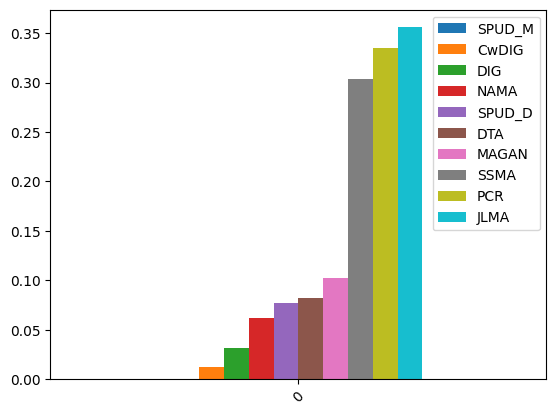

In [22]:
find_df_differences(split = "all").plot(kind = "bar", rot = 45)

<Axes: >

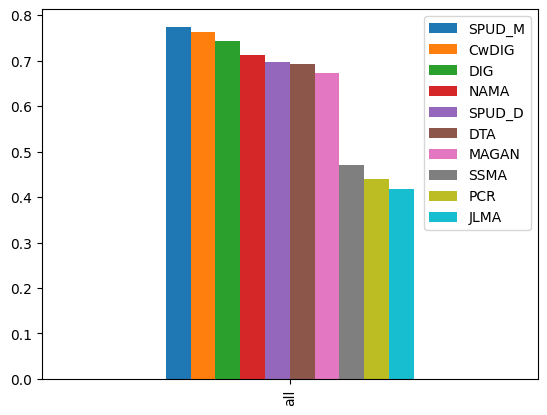

In [23]:
get_avg_df().head(1).plot(kind = "bar", rot = 90)

In [24]:
get_avg_df(split = "random")

SPUD_M     CwDIG     MAGAN       DIG      NAMA    SPUD_D  \
random    0.730522  0.704866  0.688924  0.665235  0.653429  0.618989   
rankings  1.000000  2.000000  3.000000  4.000000  5.000000  6.000000   

               DTA     SSMA      JLMA        PCR  
random    0.592825  0.32256  0.312995   0.273505  
rankings  7.000000  8.00000  9.000000  10.000000

In [25]:
get_avg_df(split = "skewed")#.plot(kind = "bar", rot = 90)

SPUD_M     CwDIG       DIG      NAMA     MAGAN    SPUD_D  \
skewed    0.755536  0.705346  0.667344  0.604624  0.580868  0.578587   
rankings  1.000000  2.000000  3.000000  4.000000  5.000000  6.000000   

               DTA      SSMA      JLMA        PCR  
skewed    0.523751  0.271168  0.239037   0.182197  
rankings  7.000000  8.000000  9.000000  10.000000

In [26]:
get_avg_df(split = "even")#.head(1).plot(kind = "bar", rot = 90)

SPUD_M     CwDIG       DIG      NAMA     MAGAN    SPUD_D  \
even      0.843248  0.804018  0.751198  0.720955  0.688876  0.673755   
rankings  1.000000  2.000000  3.000000  4.000000  5.000000  6.000000   

               DTA      SSMA       PCR       JLMA  
even      0.603652  0.415589  0.292712   0.249207  
rankings  7.000000  8.000000  9.000000  10.000000

In [27]:
get_avg_df(split = "distort")

DTA       DIG      JLMA    CwDIG      NAMA    SPUD_M    SPUD_D  \
distort   0.84068  0.802157  0.800032  0.79848  0.790326  0.789892  0.788597   
rankings  1.00000  2.000000  3.000000  4.00000  5.000000  6.000000  7.000000   

            MAGAN      SSMA        PCR  
distort   0.69841  0.566424   0.563499  
rankings  8.00000  9.000000  10.000000

In [28]:
find_df_differences(split = "distort")#.plot(kind = "bar", rot = 90)

DTA       DIG      JLMA   CwDIG      NAMA    SPUD_M    SPUD_D    MAGAN  \
0  0.0  0.038523  0.040648  0.0422  0.050354  0.050788  0.052083  0.14227   

       SSMA       PCR  
0  0.274257  0.277181

In [29]:
get_avg_df(split = "turn")

DTA      DIG       PCR     CwDIG   SPUD_D      NAMA    SPUD_M  \
turn      0.870132  0.84891  0.841422  0.838629  0.83311  0.820232  0.804472   
rankings  1.000000  2.00000  3.000000  4.000000  5.00000  6.000000  7.000000   

              SSMA     MAGAN       JLMA  
turn      0.787364  0.730566   0.395557  
rankings  8.000000  9.000000  10.000000

#### Plotting these simple rankings 

In [35]:
def plot_simple_ranks():
    #Create a dataframe to add too:
    df = get_avg_df().head(1).drop(columns = ["SPUD_D"])

    #Add all the other dfs
    for kind in ["random", "skewed", "even", "distort", "turn"]:
        df = df._append(get_avg_df(split = kind).head(1).drop(columns = ["SPUD_D"]))
    
    
    return df.plot(kind = "bar", rot = 0, figsize = (17, 6))


<Axes: >

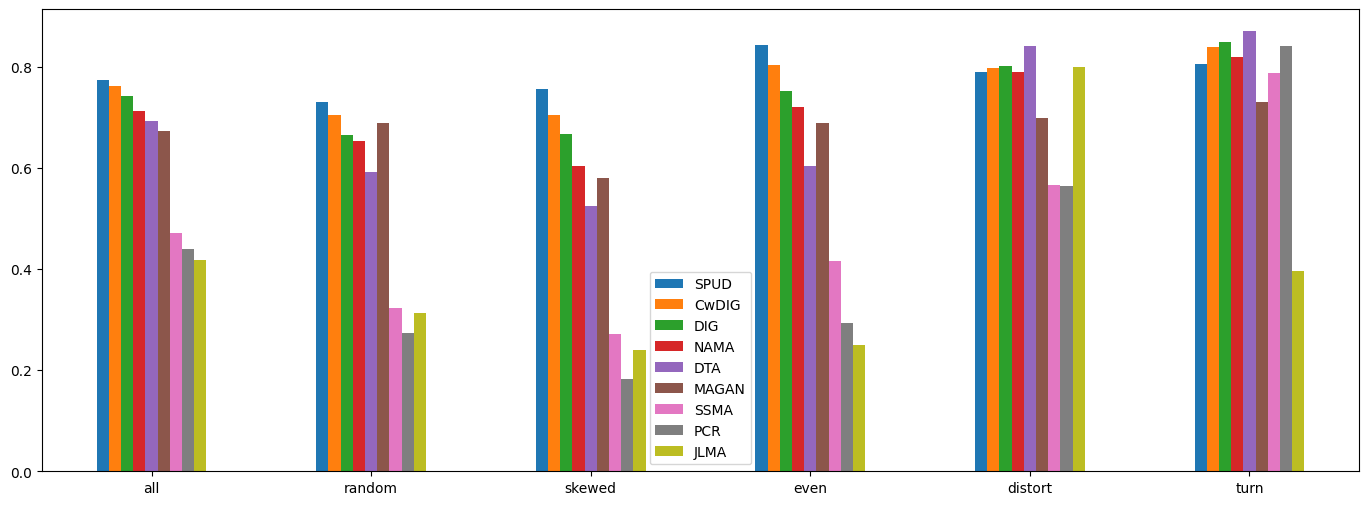

In [36]:
plot_simple_ranks()

## Comparing Parameters across all methods

### KNN and Percent of Anchors

In [4]:
def line_plot_methods(argument = "Percent_of_Anchors", metric = "Combined_Metric",   **kwargs):
    "subset should equal none or the csv file name"

    #Subset the data
    df_subset = subset_df(df, **kwargs)

    #Create figure
    plt.figure(figsize=(14,7))

    #Plot the graphs
    plt.plot(df_subset[df_subset["method"] == "SSMA"].groupby(argument)[metric].mean(), label = "SSMA")
    plt.plot(df_subset[df_subset["method"] == "DTA"].groupby(argument)[metric].mean(), label = "DTA")
    plt.plot(df_subset[df_subset["method"] == "DIG"].groupby(argument)[metric].mean(), label = "DIG")
    plt.plot(df_subset[df_subset["method"] == "CwDIG"].groupby(argument)[metric].mean(), label = "CwDIG")
    plt.plot(df_subset[df_subset["method"] == "JLMA"].groupby(argument)[metric].mean(), label = "JLMA")
    plt.plot(df_subset[df_subset["method"] == "MAGAN"].groupby(argument)[metric].mean(), label = "MAGAN")
    plt.plot(df_subset[df_subset["method"] == "PCR"].groupby(argument)[metric].mean(), label = "Procrustees")

    #Show different SPUD arguments
    plt.plot(df_subset[df_subset["SPUDS_Algorithm"] == "distance"].groupby(argument)[metric].mean(), label = "SPUD - Distance")
    plt.plot(df_subset[df_subset["SPUDS_Algorithm"] == "merge"].groupby(argument)[metric].mean(), label = "SPUD - Merge")

    if argument != "Percent_of_KNN":
        plt.plot(df_subset[df_subset["method"] == "NAMA"].groupby(argument)[metric].mean(), label = "NAMA")



    #Make it pretty
    plt.xlabel(argument)
    plt.ylabel(metric)
    plt.legend()
    plt.title("Methods Together")

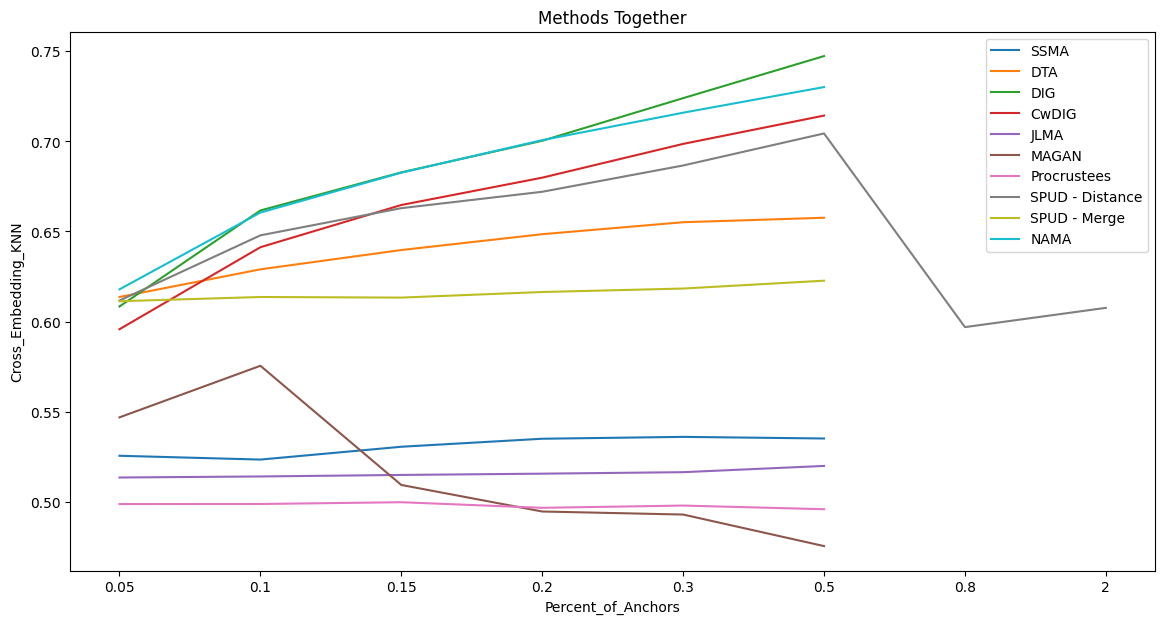

In [5]:
line_plot_methods(metric = "Cross_Embedding_KNN")

In [40]:
line_plot_methods(argument = "Percent_of_KNN") #csv_file = "iris"

NameError: name 'line_plot_methods' is not defined

### Sparse Data comparison

#### Set Up

In [7]:
from SPUD_Copy import SPUD_Copy
from DIG import DIG
import random

In [8]:
sparse_dc = tma.test_manifold_algorithms(csv_file="ecoli_5.csv", split= "skewed", percent_of_anchors= [0.8], verbose=2, random_state=42)
sparse_dc.split_A = sparse_dc.split_A
sparse_dc.split_B = sparse_dc.split_B
#Randomly select points
import random
random_points = random.sample(range(len(sparse_dc.split_A)), k = int(len(sparse_dc.split_A)/10))

#Create the macthing anchors
sparse_dc.anchors = np.array([range(int(len(sparse_dc.split_A)/10)), random_points]).T

#Subset split A to only have some of the points
sparse_dc.split_A = sparse_dc.split_A[random_points]

#Create labels
sparse_labels = np.hstack([sparse_dc.labels[random_points], sparse_dc.labels])


 
 
---------------------------       Initalizing class with ecoli_5.csv data       ---------------------------

Splitting the data in a skewed fashion
Split A features shape: (327, 3)
Split B Features shape (327, 4)
MDS initialized with 3 components
The knn values are: (2, 9, 16, 23, 30, 37, 44, 51, 58, 65)


#### Sparse DIG

In [9]:
sparse_DIG = DIG(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors, DTM = "log", knn = 4)

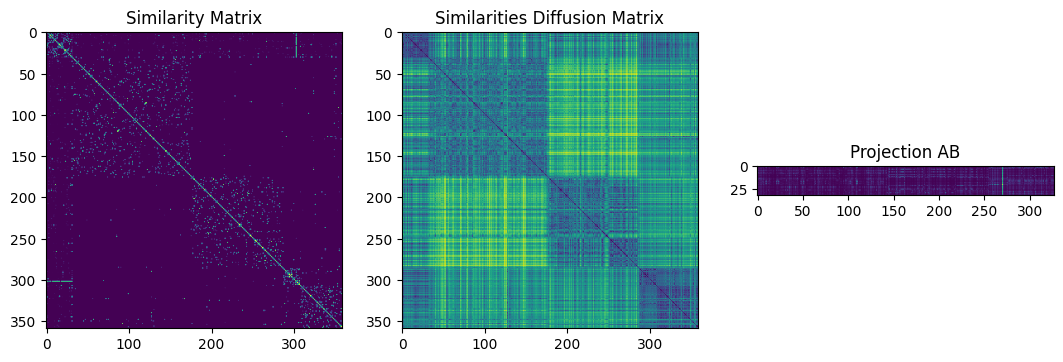

In [10]:
sparse_DIG.plot_graphs()

Model Stress: 603.5261559972098
Cross Embedding: 0.7859327217125383
Can't compute FOSCTTM with different domain shapes.


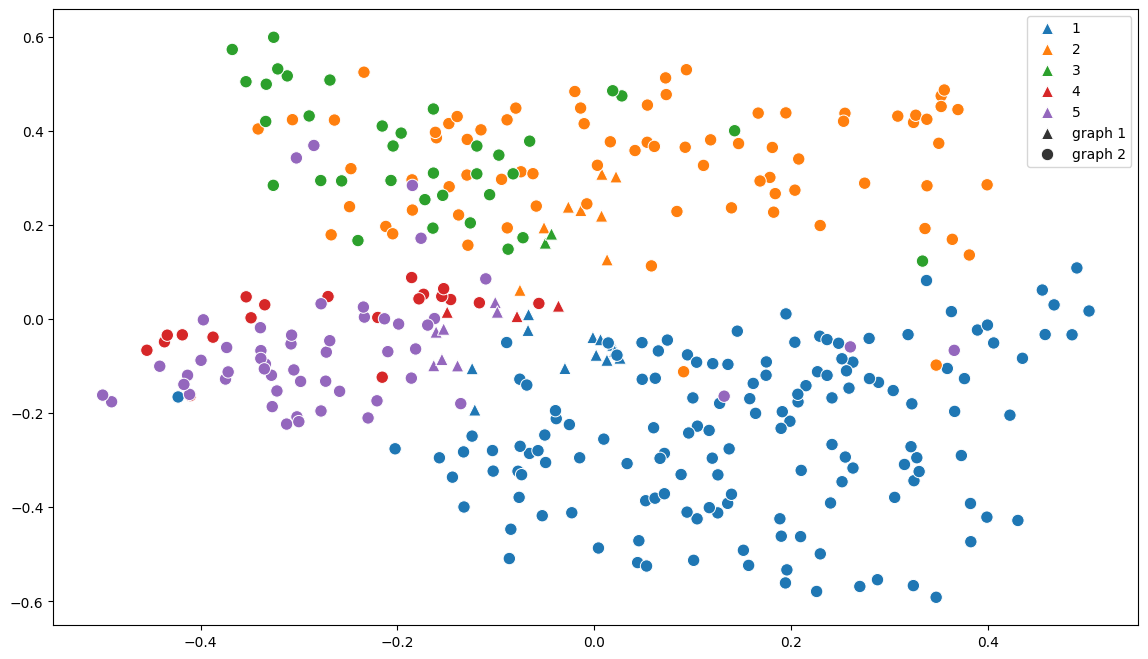

In [11]:
sparse_DIG.plot_emb(sparse_labels, show_lines = False, show_anchors = False)

#### Sparse SPUD

In [12]:
sparse_spud = SPUD_Copy(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors, operation = "sqrt", knn = 4)
#sparse_spud.plot_graphs()

Model Stress: 466.733024849402
Cross Embedding: 0.2782874617737003
Can't compute FOSCTTM with different domain shapes.


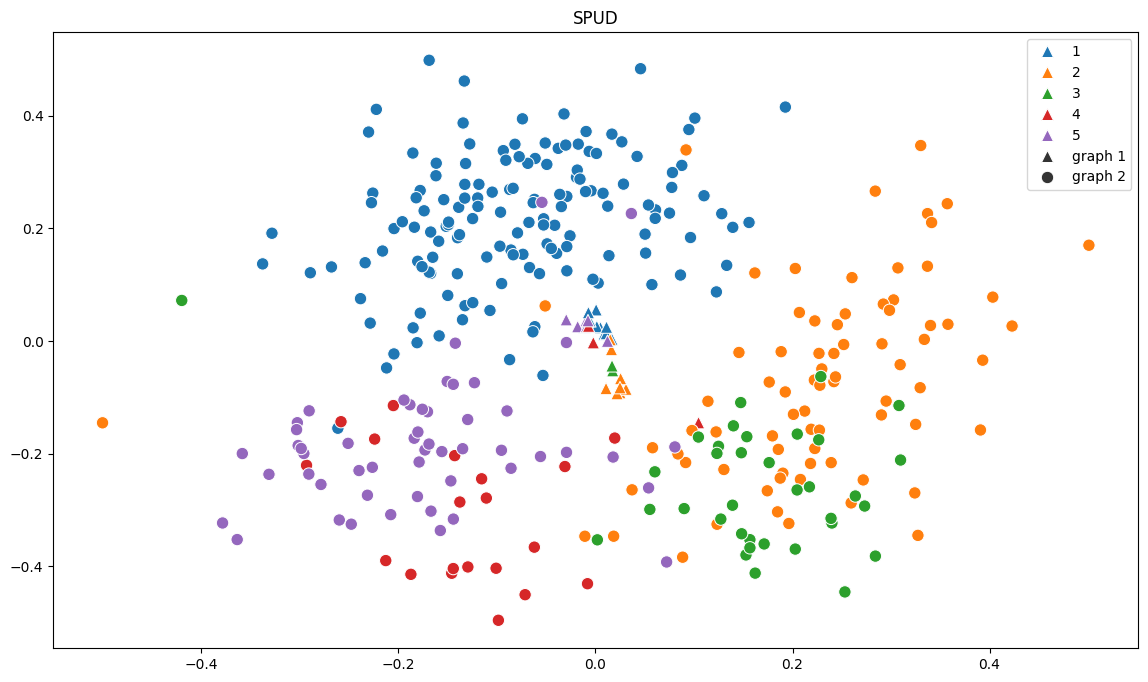

In [13]:
sparse_spud.plot_emb(sparse_labels, show_lines = False, show_anchors = False)

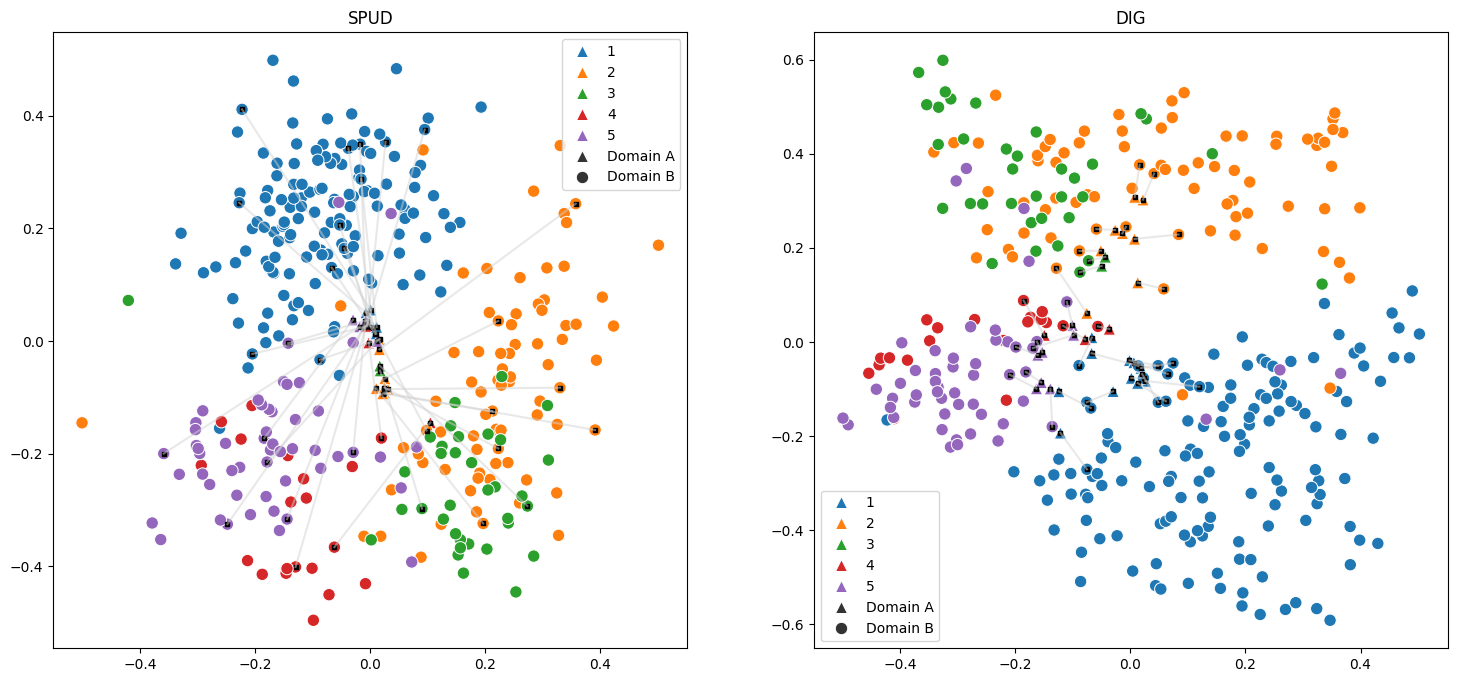

<Figure size 1400x800 with 0 Axes>

In [14]:
#Plot them side by side
fig, axes = plt.subplots(1, 2, figsize = (18, 8))

#Set Title
axes[0].set_title("SPUD")
axes[1].set_title("DIG")

#Veiw the manifold. Those shown as Triangles are from GX
styles = ['Domain A' if i < sparse_spud.len_A else 'Domain B' for i in range(len(sparse_spud.emb[:]))]
plt.figure(figsize=(14, 8))

#Now plot the points
import seaborn as sns
sns.scatterplot(x = sparse_spud.emb[:, 0], y = sparse_spud.emb[:, 1], style = styles, hue = pd.Categorical(sparse_labels), s=80, markers= {"Domain A": "^", "Domain B" : "o"}, ax = axes[0])
sns.scatterplot(x = sparse_DIG.emb[:, 0], y = sparse_DIG.emb[:, 1], style = styles, hue = pd.Categorical(sparse_labels), s=80, markers= {"Domain A": "^", "Domain B" : "o"}, ax = axes[1])

#To plot line connections
for position, point in enumerate(random_points):
    axes[0].plot([sparse_spud.emb[position, 0], sparse_spud.emb[sparse_spud.len_A + point, 0]], [sparse_spud.emb[position, 1], sparse_spud.emb[sparse_spud.len_A + point, 1]], color = 'lightgrey', alpha = .5)
    axes[1].plot([sparse_DIG.emb[position, 0], sparse_DIG.emb[sparse_DIG.len_A + point, 0]], [sparse_DIG.emb[position, 1], sparse_DIG.emb[sparse_DIG.len_A + point, 1]], color = 'lightgrey', alpha = .5)

#Put black dots on the Anchors
axes[0].scatter(sparse_spud.emb[sparse_spud.known_anchors + np.array([0, sparse_spud.len_A]), 0], sparse_spud.emb[sparse_spud.known_anchors + np.array([0, sparse_spud.len_A]), 1], s = 10, color = 'black', marker="s")
axes[1].scatter(sparse_DIG.emb[sparse_DIG.known_anchors + np.array([0, sparse_spud.len_A]), 0], sparse_DIG.emb[sparse_DIG.known_anchors + np.array([0, sparse_spud.len_A]), 1], s = 10, color = 'black', marker="s")


#Show plot
plt.show()

## Label Prediction Visualization

In [3]:
import DIG_final
dc = tma.test_manifold_algorithms(csv_file="glass.csv", split= "skewed", percent_of_anchors= [0.8], verbose=2, random_state=42)


 
 
---------------------------       Initalizing class with glass.csv data       ---------------------------

Splitting the data in a skewed fashion
Split A features shape: (214, 4)
Split B Features shape (214, 5)
MDS initialized with 4 components
The knn values are: (2, 7, 12, 17, 22, 27, 32, 37, 42, 47)


Cross Embedding: 0.6355140186915887
FOSCTTM: 0.04142283168835705


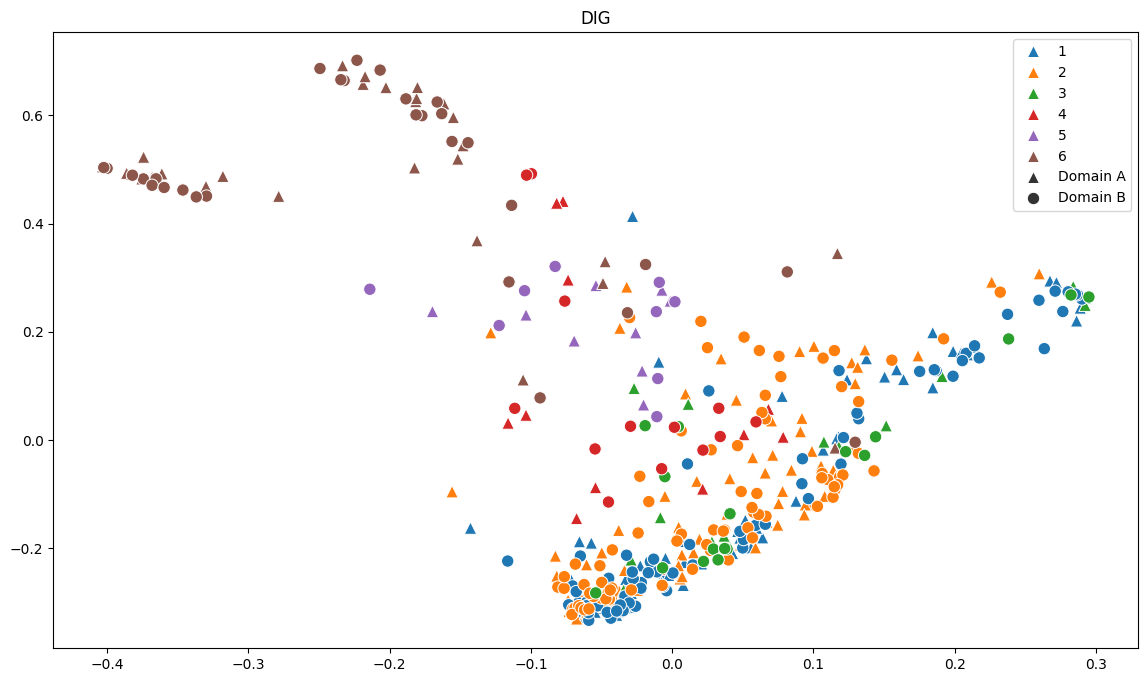

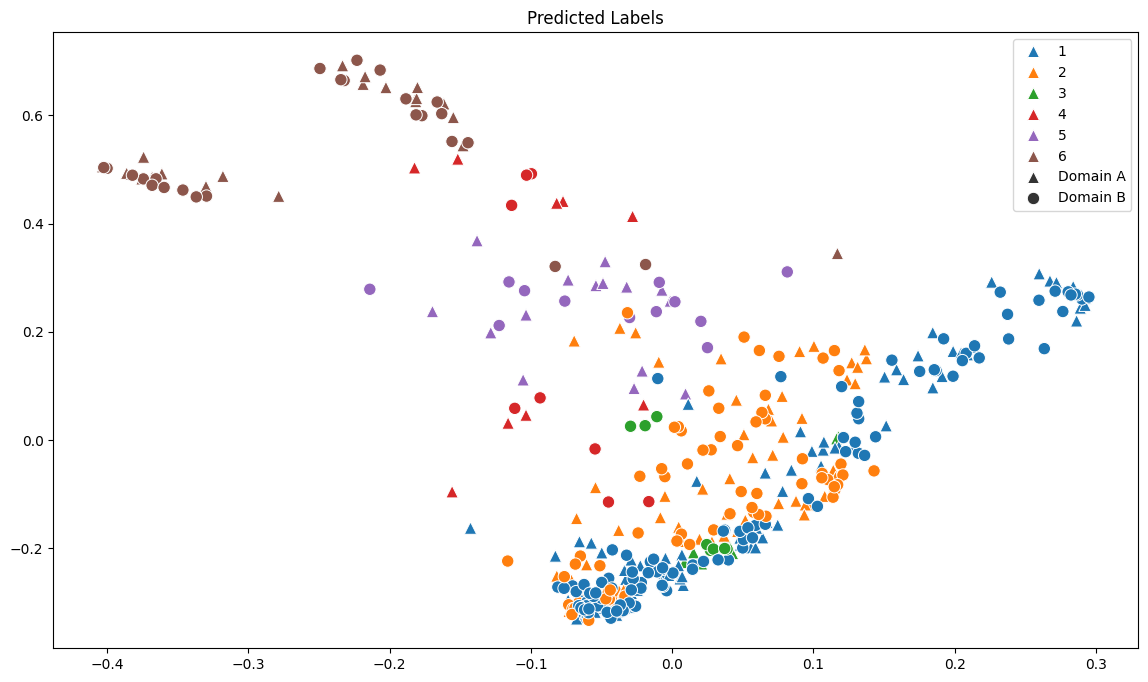

In [5]:
LPD = DIG_final.DIG()
LPD.fit(dc.split_A, dc.split_B, dc.anchors[:180])
LPD.plot_emb(dc.labels_doubled, show_lines = False, show_anchors = False, show_pred = True) #Gets the embedding we can use

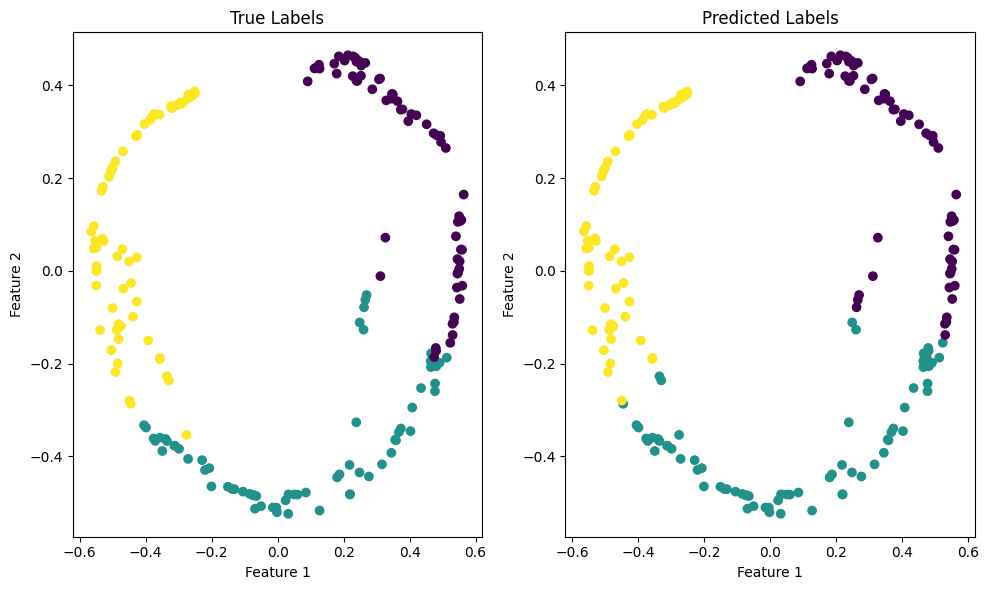

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(LPD.emb[:LPD.len_A, :], dc.labels)

# Step 3: Predict the labels
y_pred = knn.predict(LPD.emb[LPD.len_A:, :])

# Step 4: Plot the results
plt.figure(figsize=(10, 6))
X = LPD.emb[LPD.len_A:, :]
y = dc.labels

# Plot the true labels
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o')
plt.title('True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='o')
plt.title('Predicted Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


## Plotting the Embeddings

Data Sets that dont make sense:
Flare1 - Most of the points belong to the same class, so the CE will be high regardless of alignment

In [63]:
visual_test = tma.test_manifold_algorithms(csv_file="ecoli_5.csv", split= "even", percent_of_anchors= [0.1], verbose=2)


 
 
---------------------------       Initalizing class with ecoli_5.csv data       ---------------------------

Spliting the data evenly
Split A features shape: (327, 4)
Split B Features shape (327, 3)
MDS initialized with 3 components
The knn values are: (2, 9, 16, 23, 30, 37, 44, 51, 58, 65)


Percent of anchors used: 0.1
The amount of Nearest Neighbors: 5


/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:283: RuntimeWarning: Detected zero distance between samples 6 and 82, 26 and 66, 31 and 80, 31 and 90, 33 and 127, 38 and 291, 80 and 90. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 25 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 40 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 66 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yu

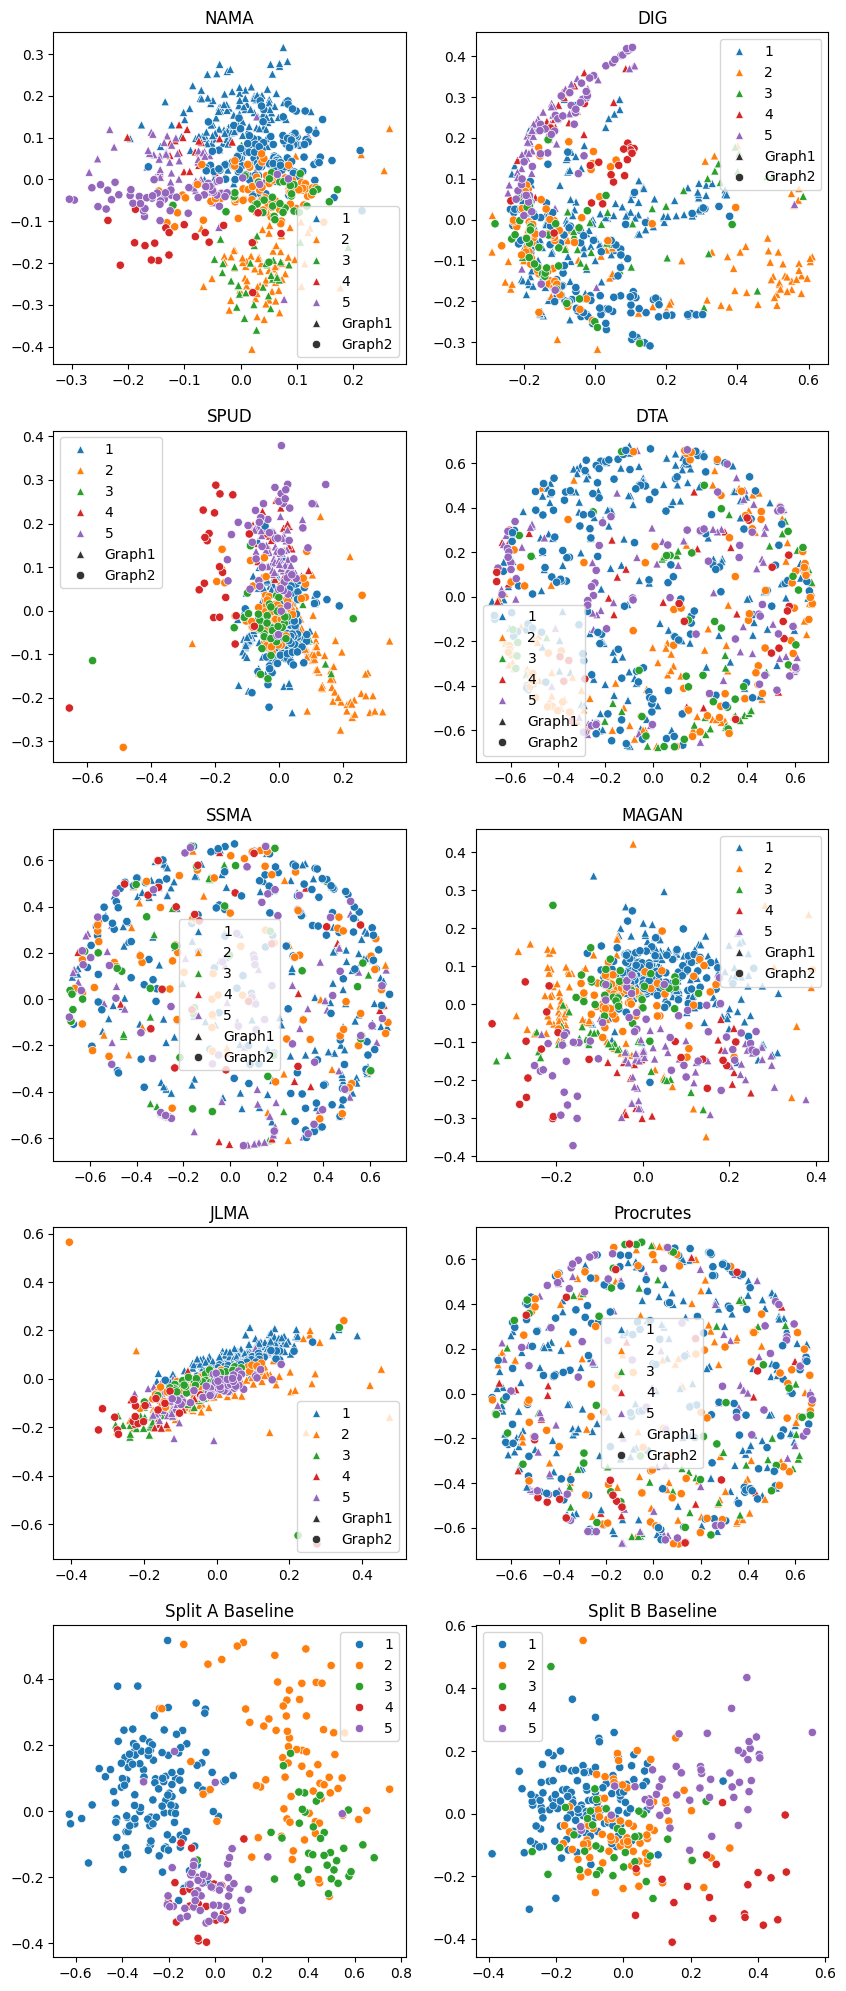

In [64]:
visual_test.plot_embeddings(knn = 5)

# Time Comparisions Below

In [65]:
#Print the complexity of CSV files and the time it takes
time_df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Time_DataFrame.csv").sort_values(by = str("iris.csv"), ignore_index=True)

#Add the amount of features for each csv file
for csv_file in time_df.columns:

    #Continue the loop if the header is Methods
    if csv_file == "Methods":

        #Create dictionaries to store feature count and instance count
        feature_dict = {"Methods" : 0}
        instance_dict = {"Methods" : "Feature Count"}
        complexity_dict = {"Methods" : "Complexity"}

        continue

    #Calulate the spcial cases
    elif csv_file == "S-curve":
        #Count Features
        feature_dict[csv_file] = 600

        #Count Instances
        instance_dict[csv_file] = 3
        complexity_dict[csv_file] = 1800

        continue

    #Calulate the spcial cases
    elif csv_file == "blobs":
        #Count Features
        feature_dict[csv_file] = 300

        #Count Instances
        instance_dict[csv_file] = 2
        complexity_dict[csv_file] = 600

        continue


    file_path = "/yunity/arusty/Graph-Manifold-Alignment/CSV Files/" + csv_file

    #Read file
    df2 = pd.read_csv(file_path)

    #Count Features
    feature_dict[csv_file] = len(df2)

    #Count Instances
    instance_dict[csv_file] = len(df2.columns)

    #Calculate complexity 
    complexity_dict[csv_file] = len(df2) * len(df2.columns)

#Append the Dictionaries
time_df = time_df._append(feature_dict, ignore_index=True)
time_df = time_df._append(instance_dict, ignore_index=True)
time_df = time_df._append(complexity_dict, ignore_index=True)


#Veiw the DataFrame
time_df.T.sort_values(by = 6).T

Methods   zoo.csv hepatitis.csv   iris.csv audiology.csv  \
0            DIG  2.051146      3.673588   3.401358       6.11107   
1           SPUD  1.979575      3.642993   3.596051      6.817885   
2           SSMA  1.159722      4.248523   4.294494      6.804995   
3            DTA  1.541715      3.795742   4.622846       9.17517   
4           NAMA  2.732113      4.872489   6.227232     14.216228   
5          MAGAN    36.202     60.454023  72.027937     66.887187   
6              0     101.0         138.0      150.0         190.0   
7  Feature Count      18.0          16.0        5.0          68.0   
8     Complexity    1818.0        2208.0      750.0       12920.0   

  parkinsons.csv  seeds.csv segmentation.csv  glass.csv heart_disease.csv  \
0       6.721155   6.336899         7.850724   5.886319         21.008766   
1       6.064839   5.099518         8.601908   8.767957         16.608557   
2       8.124955  11.139338        12.805081   14.13043         28.532746   
3       9.272984  11.307132        11.840308  11.141553         35.958692   
4      16.270395  10.448334        15.465682  19.214126         45.309474   
5      63.486195  56.742175        42.748242  61.843572         41.687702   
6          195.0      199.0            211.0      214.0             297.0   
7           23.0        8.0             20.0       10.0              14.0   
8         4485.0     1592.0           4220.0     2140.0            4158.0   

   ... titanic.csv diabetes.csv tic-tac-toe.csv Medicaldataset.csv  \
0  ...   79.618065   169.862753      247.272338          333.91487   
1  ...   49.325496    86.465402      183.209855         364.731992   
2  ...   76.844366    98.089042       276.15585         277.443343   
3  ...   82.645041   202.853388      277.613282         298.365653   
4  ...  441.442726   627.065093     1195.106548        3039.580123   
5  ...   54.630012    60.786258       113.20653          27.341562   
6  ...       712.0        768.0           958.0             1319.0   
7  ...         8.0          9.0            10.0                9.0   
8  ...      5696.0       6912.0          9580.0            11871.0   

  treeData.csv winequality-red.csv      car.csv water_potability.csv  \
0   606.335758          670.495568   623.620235           713.969006   
1   365.956391           383.02885   473.174882           695.340593   
2   506.298484          666.250582   750.995811           994.201673   
3   565.135435          698.865259   760.982209           306.629771   
4   3976.05421         5446.704218  6871.173276         10911.287093   
5   497.965705           32.816214   407.051648           653.820618   
6       1440.0              1599.0       1728.0               2011.0   
7         61.0                12.0          7.0                 11.0   
8      87840.0             19188.0      12096.0              22121.0   

      chess.csv optdigits.csv  
0   2198.150119   2975.556961  
1   1271.707261    2712.52794  
2   1721.018906   2350.375657  
3   1741.178858   2519.571152  
4  46112.782603  85038.966415  
5   1225.276301        61.125  
6        3196.0        3823.0  
7          37.0          65.0  
8      118252.0      248495.0  

[9 rows x 31 columns]

In [66]:
time_df.T.sort_values(by = 6).T.drop(columns = ["Methods"]).mean(axis = 1).sort_values()

7      21.433333
5     146.407922
1     234.785702
3     281.642362
2     287.123525
0     309.506167
6          820.4
4    5526.709339
8        23313.5
dtype: object